In [1]:
!curl --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-GB,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kagglesdsdata/competitions/4117/46665/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1608142800&Signature=EUe3649BHhLYKVK8C2AIL%2BJwT%2Bi578kSbMuaCtDHCMSGDPHZzGSTEd5%2BGcLt5dNLuAGLlGbSjyKHuLfVhWfMC%2BLp1I2BLimioiv0wcXd%2F4XZiRppnZHu7SE2Vjrzf9K%2BhDeGt0n0wTtSy%2BP8nfxt7S%2Ff3xU3WutySJA9BMg1DdiaYzzi8IQU%2BRHwYIu6H9rwHcnAtdiSa7gtlUhqjaN%2FKPAByt3NkSEitbhi34yGIaeCvqcwLUpCYNefLQtEBbt1sSyj1sz7aLaHbUtGd8bkVPHgU9zy9%2FgirHXOngvL%2Fqr3KvZzVmmGVlGKYuvcmQU4uH1W399v3ghZpfew34AfqQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.7z' --output 'train.7z'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17.5G  100 17.5G    0     0   236M      0  0:01:15  0:01:15 --:--:--  229M


In [4]:
pip install xgboost

     |████████████████████████████████| 157.5 MB 50 kB/s /s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
#separating byte files and asm files 

# source = 'train'
# destination_1 = 'byteFiles'
# destination_2 = 'asmFiles'

# # we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
# if not os.path.isdir(destination_1):
#     os.makedirs(destination_1)
# if not os.path.isdir(destination_2):
#     os.makedirs(destination_2)

# # if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# # for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# # 'byteFiles' folder

# # so by the end of this snippet we will separate all the .byte files and .asm files
# if os.path.isdir(source):
#     data_files = os.listdir(source)
#     for file in data_files:
#         print(file)
#         if (file.endswith("bytes")):
#             shutil.move(source+'/'+file,destination_1)
#         if (file.endswith("asm")):
#             shutil.move(source+'/'+file,destination_2)

In [2]:
print(len(os.listdir('byteFiles')))
print(len(os.listdir('asmFiles')))

10868
10868


In [6]:
!curl --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-GB,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kagglesdsdata/competitions/4117/46665/trainLabels.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1608119843&Signature=TVEbbYV82d7OENTLAQjvAt2FEQbIKeuKVyM0ZZYw%2B9GGXz66hoHdJu6W2r1ltUxn3gX5pKCeyo2nlcGb41mHFHBmpGwNqsWipsmmWi4OLH%2BXmc2Dg7LjcuCUTVNls9CP7yCHtZGGj5vfYcZBT05Sq2x4Hd13jKH3TOXZbPRh58sAkkLGq9jnw%2BD%2F4JSIC7Fpq9TtxHx1Ob%2Be%2BLIVyyWcY%2B14Ga85AfhxGF5lJdCYtp%2FZItBmGCCpvzeZFUnbHglVj%2BX5N4%2FxHckUOITCqrA89MPetnYrXnZEBDym%2B8ptBYRmB0ZaufqclEp%2Fnk43FwrWfoADnEJ%2FiNpxBgyg3NTJsA%3D%3D&response-content-disposition=attachment%3B+filename%3DtrainLabels.csv' --output 'trainLabels.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  265k  100  265k    0     0  1780k      0 --:--:-- --:--:-- --:--:-- 1768k2k


<IPython.core.display.Javascript object>


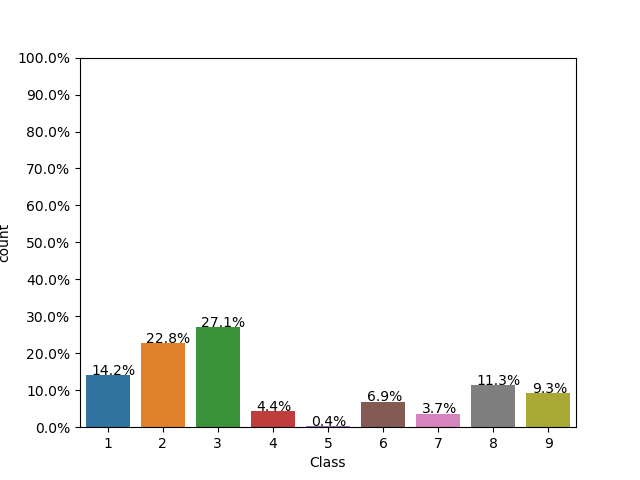

In [3]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

# Feature extraction 

## File size of byte files as a feature

In [4]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  6VTkgzifPd5Z0BXF3cuY  6.949219      2
1  fQs8jHrye30NE6KMP9RO  1.640625      6
2  0GvtWEPUBfDAcMbiYVSR  6.703125      3
3  1T0BWPoJVtNFzsycKhlr  1.640625      6
4  KHQJDZ7toAnaeLSifmIv  0.363281      8


# box plots of file size (.byte files) feature

<IPython.core.display.Javascript object>


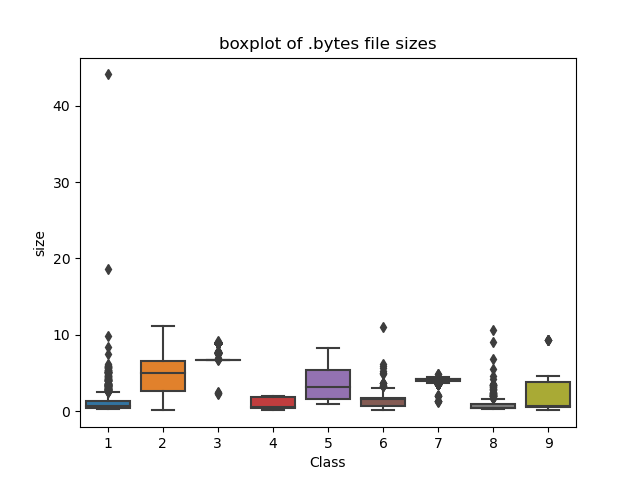

In [5]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

# feature extraction from byte files

In [15]:
%%time
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

# files = os.listdir('byteFiles')
# filenames=[]
# array=[]
# for file in files:
#     if(file.endswith("bytes")):
#         file=file.split('.')[0]
#         text_file = open('byteFiles/'+file+".txt", 'w+')
#         with open('byteFiles/'+file+".bytes","r") as fp:
#             lines=""
#             for line in fp:
#                 a=line.rstrip().split(" ")[1:]
#                 b=' '.join(a)
#                 b=b+"\n"
#                 text_file.write(b)
#             fp.close()
#             os.remove('byteFiles/'+file+".bytes")
#         text_file.close()

# files = os.listdir('byteFiles')
# filenames2=[]
# feature_matrix = np.zeros((len(files),257),dtype=int)
# k=0


# #program to convert into bag of words of bytefiles
# #this is custom-built bag of words this is unigram bag of words
# byte_feature_file=open('result.csv','w+')
# byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
# byte_feature_file.write("\n")
# for file in files:
#     filenames2.append(file)
#     byte_feature_file.write(file+",")
#     if(file.endswith("txt")):
#         with open('byteFiles/'+file,"r") as byte_flie:
#             for lines in byte_flie:
#                 line=lines.rstrip().split(" ")
#                 for hex_code in line:
#                     if hex_code=='??':
#                         feature_matrix[k][256]+=1
#                     else:
#                         feature_matrix[k][int(hex_code,16)]+=1
#         byte_flie.close()
#     for i, row in enumerate(feature_matrix[k]):
#         if i!=len(feature_matrix[k])-1:
#             byte_feature_file.write(str(row)+",")
#         else:
#             byte_feature_file.write(str(row))
#     byte_feature_file.write("\n")
    
#     k += 1

# byte_feature_file.close()

In [6]:
byte_features=pd.read_csv("result.csv")
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

ID       0      1      2      3      4      5      6  \
0  6VTkgzifPd5Z0BXF3cuY  368978  13560  13474  11198  13120  15302  14775   
1  fQs8jHrye30NE6KMP9RO   65983   2414   1876   2028   2205   1618   1649   

       7      8  ...    f7     f8    f9    fa    fb     fc    fd     fe  \
0  10762  14436  ...   259  28062   173   135   136  10746   173  15549   
1   1670   2141  ...  1654   1759  1633  1588  1565   1771  1547   1878   

      ff     ??  
0  60886   5420  
1   4738  26772  

[2 rows x 258 columns]

In [7]:
data_size_byte.head(2)

ID      size  Class
0  6VTkgzifPd5Z0BXF3cuY  6.949219      2
1  fQs8jHrye30NE6KMP9RO  1.640625      6

In [8]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head(2)

ID       0      1      2      3      4      5      6  \
0  6VTkgzifPd5Z0BXF3cuY  368978  13560  13474  11198  13120  15302  14775   
1  fQs8jHrye30NE6KMP9RO   65983   2414   1876   2028   2205   1618   1649   

       7      8  ...    f9    fa    fb     fc    fd     fe     ff     ??  \
0  10762  14436  ...   173   135   136  10746   173  15549  60886   5420   
1   1670   2141  ...  1633  1588  1565   1771  1547   1878   4738  26772   

       size  Class  
0  6.949219      2  
1  1.640625      6  

[2 rows x 260 columns]

In [9]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(byte_features_with_size)

In [10]:
result.head(2)

ID         0         1         2         3         4  \
0  6VTkgzifPd5Z0BXF3cuY  0.161104  0.019090  0.007496  0.006041  0.008032   
1  fQs8jHrye30NE6KMP9RO  0.028810  0.003399  0.001044  0.001094  0.001350   

          5         6         7         8  ...        f9        fa        fb  \
0  0.008660  0.008329  0.009904  0.012845  ...  0.000756  0.000551  0.000599   
1  0.000916  0.000930  0.001537  0.001905  ...  0.007141  0.006482  0.006889   

         fc        fd        fe        ff        ??      size  Class  
0  0.123605  0.000812  0.080860  0.083009  0.000383  0.155844      2  
1  0.020371  0.007263  0.009766  0.006460  0.001890  0.035250      6  

[2 rows x 260 columns]

In [11]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  6VTkgzifPd5Z0BXF3cuY  0.161104  0.019090  0.007496  0.006041  0.008032   
1  fQs8jHrye30NE6KMP9RO  0.028810  0.003399  0.001044  0.001094  0.001350   
2  0GvtWEPUBfDAcMbiYVSR  0.004640  0.007754  0.001802  0.001820  0.001993   
3  1T0BWPoJVtNFzsycKhlr  0.028135  0.003207  0.000977  0.001086  0.001399   
4  KHQJDZ7toAnaeLSifmIv  0.009449  0.001012  0.000139  0.000243  0.000357   

          5         6         7         8  ...        f9        fa        fb  \
0  0.008660  0.008329  0.009904  0.012845  ...  0.000756  0.000551  0.000599   
1  0.000916  0.000930  0.001537  0.001905  ...  0.007141  0.006482  0.006889   
2  0.001888  0.001777  0.003079  0.002909  ...  0.013704  0.012899  0.014497   
3  0.000895  0.000929  0.001529  0.001945  ...  0.006423  0.006050  0.006639   
4  0.000217  0.000150  0.000240  0.000353  ...  0.001220  0.001098  0.001197   

         fc        fd        fe        ff        ??      size  Class  
0  0.123605  0.000812  0.080860  0.083009  0.000383  0.155844      2  
1  0.020371  0.007263  0.009766  0.006460  0.001890  0.035250      6  
2  0.036750  0.015507  0.016584  0.009301  0.105263  0.150254      3  
3  0.020486  0.007023  0.008721  0.006199  0.002035  0.035250      6  
4  0.008063  0.001131  0.001482  0.002540  0.000636  0.006233      8  

[5 rows x 260 columns]

# Multivariate Analysis

<IPython.core.display.Javascript object>


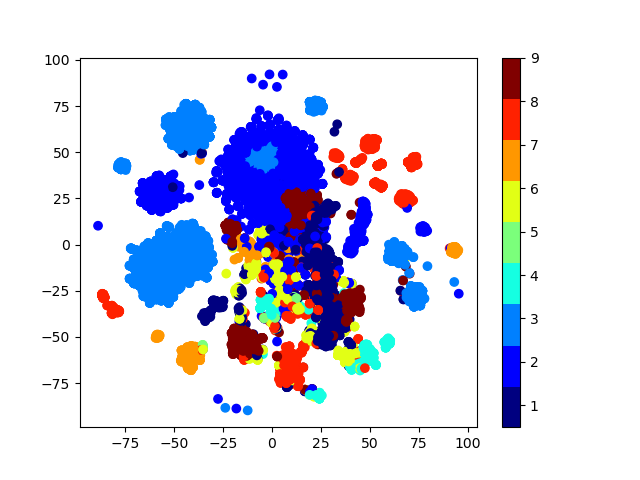

In [12]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


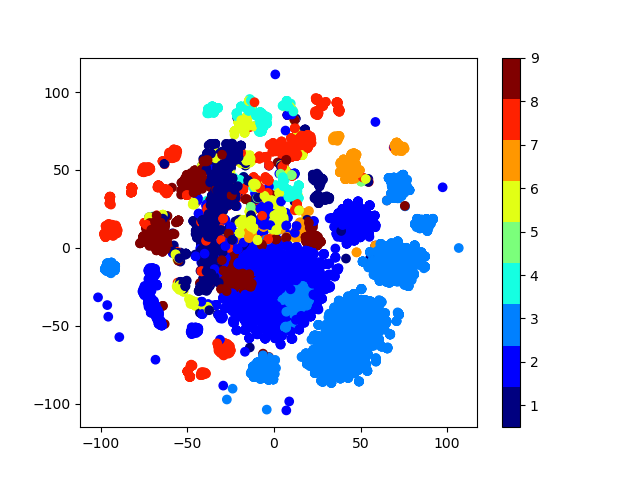

CPU times: user 3min 22s, sys: 993 ms, total: 3min 23s
Wall time: 1min 1s


In [13]:
%%time
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [14]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [15]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


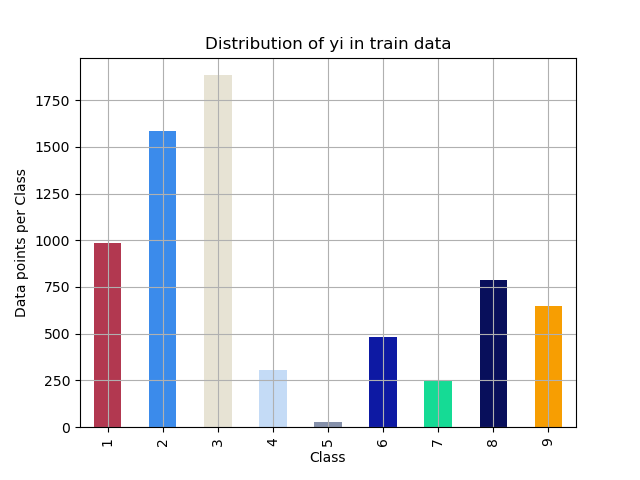

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


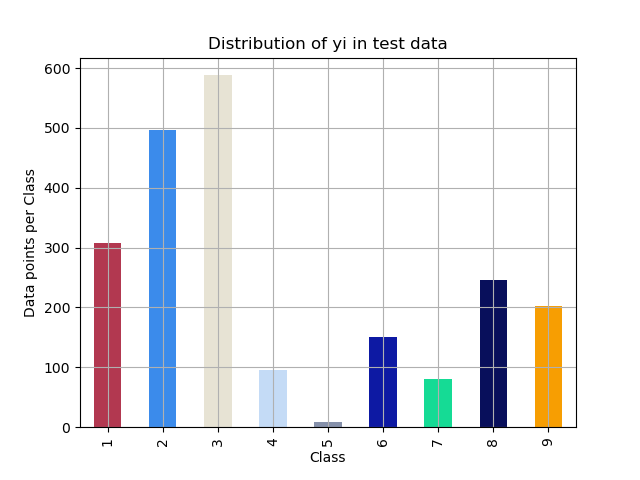

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


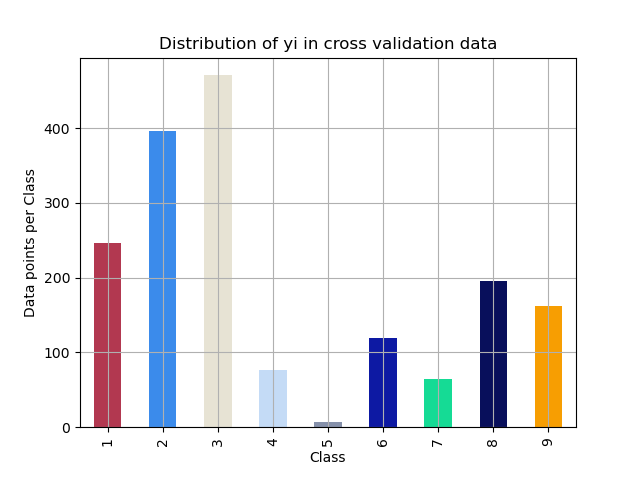

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [16]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = ['#b23850', '#3b8beb', '#e7e3d4', '#c4dbf6', '#8590aa', '#0d19a3', '#15db95', '#080f5b', '#f79e02']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = ['#b23850', '#3b8beb', '#e7e3d4', '#c4dbf6', '#8590aa', '#0d19a3', '#15db95', '#080f5b', '#f79e02']
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = ['#b23850', '#3b8beb', '#e7e3d4', '#c4dbf6', '#8590aa', '#0d19a3', '#15db95', '#080f5b', '#f79e02']
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [17]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

# Machine Learning Models

## Machine Leaning Models on bytes files

### Random Model

Log loss on Cross Validation Data using Random Model 2.4286435009478087
Log loss on Test Data using Random Model 2.4845222439120946
Number of misclassified points  87.85648574057038
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


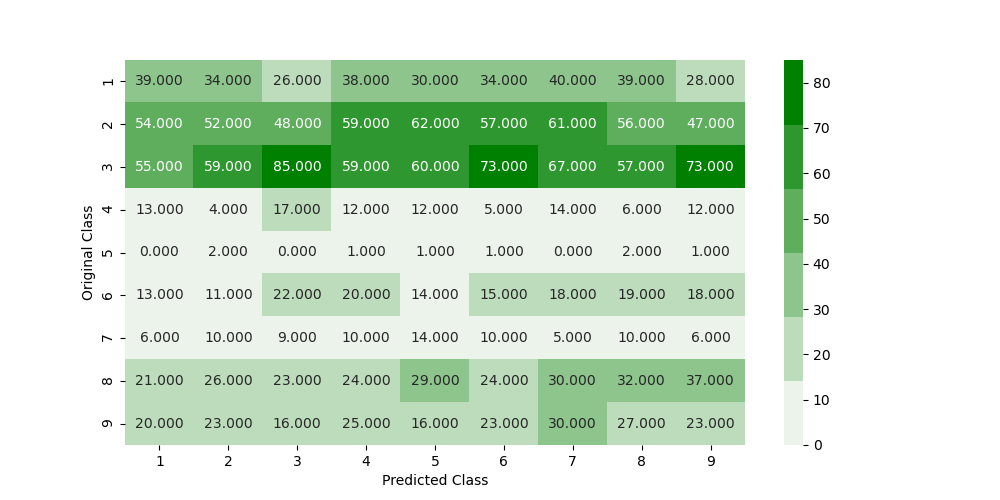

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


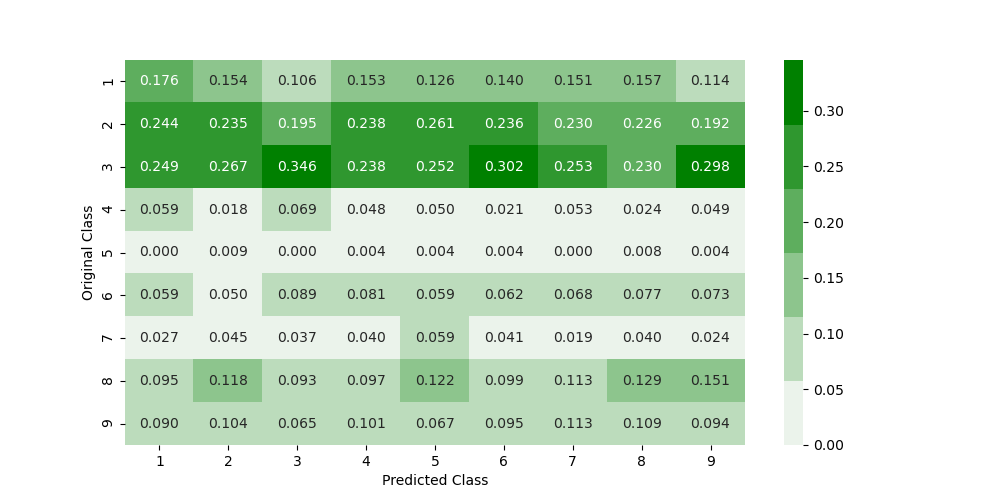

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


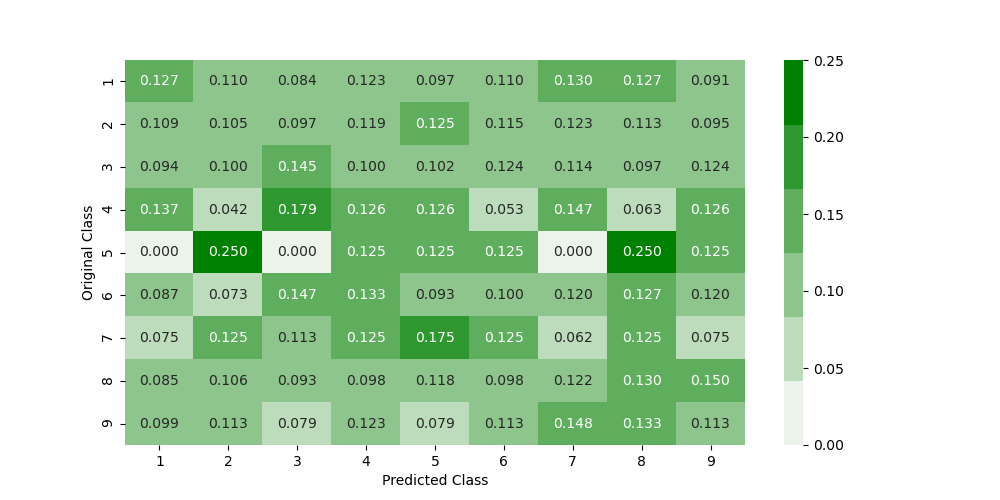

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 574 ms, sys: 60.8 ms, total: 634 ms
Wall time: 608 ms


In [18]:
%%time
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

# K Nearest Neighbour Classification

log_loss for k =  1 is 0.2483608240957811
log_loss for k =  3 is 0.22928377482749707
log_loss for k =  5 is 0.23987811463198053
log_loss for k =  7 is 0.2523421965722207
log_loss for k =  9 is 0.2617787093464057
log_loss for k =  11 is 0.2740534016794737
log_loss for k =  13 is 0.2862717039202088


<IPython.core.display.Javascript object>


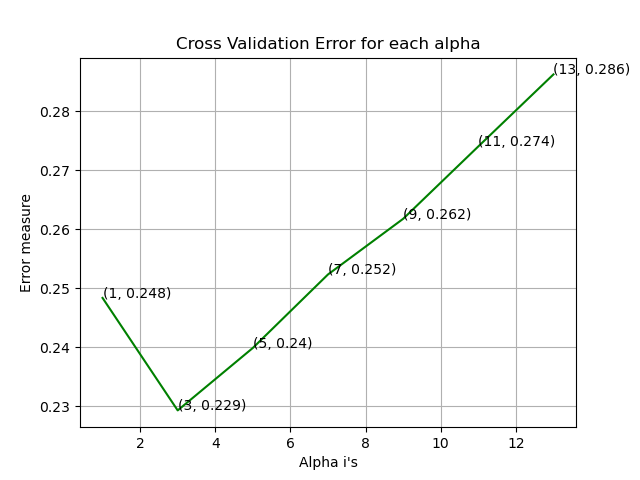

For values of best alpha =  3 The train log loss is: 0.11160527336280174
For values of best alpha =  3 The cross validation log loss is: 0.22928377482749707
For values of best alpha =  3 The test log loss is: 0.19711659026217945
Number of misclassified points  4.8298068077276906
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


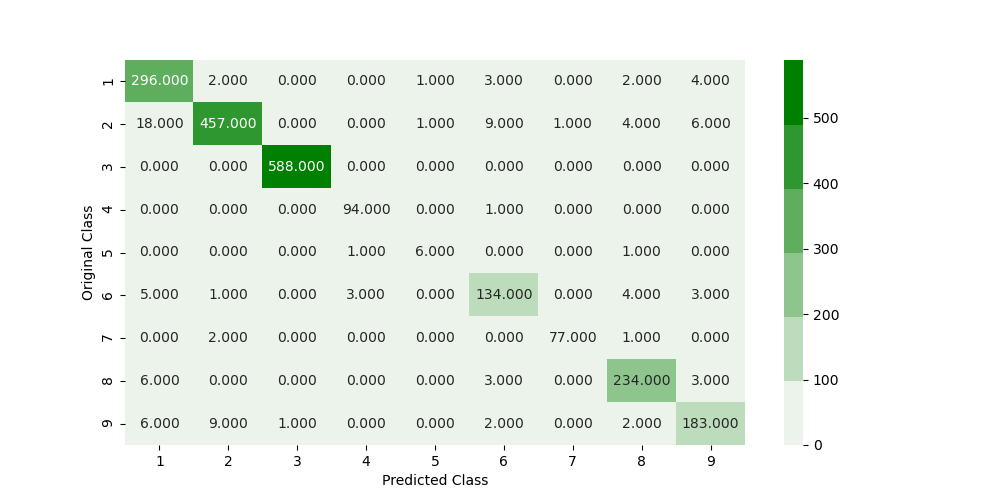

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


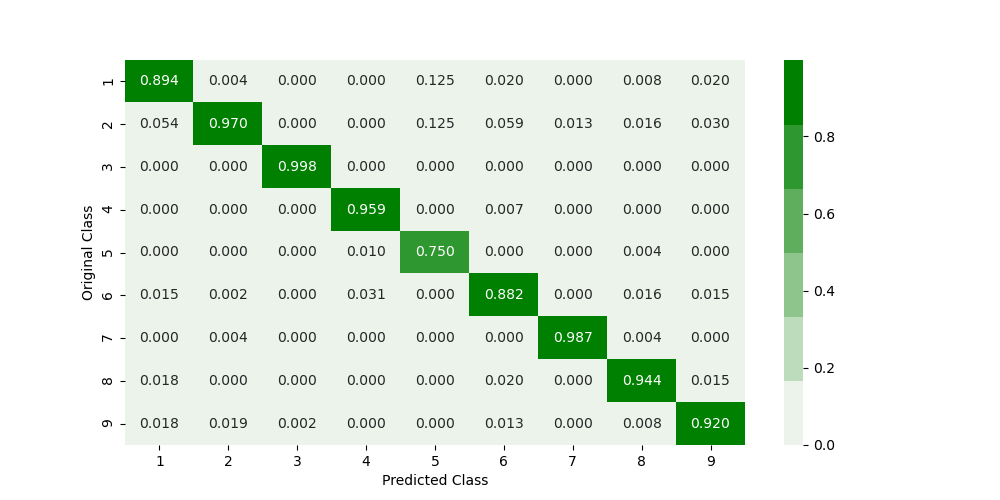

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


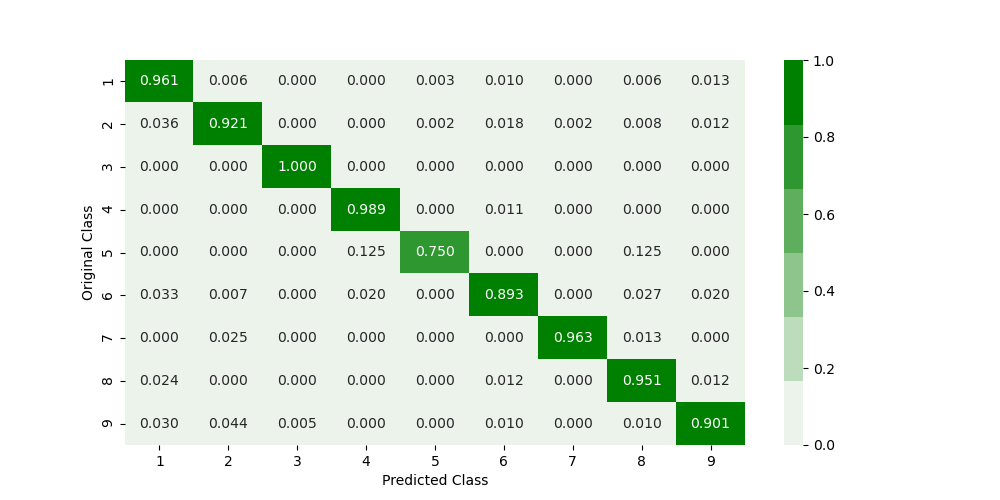

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 2min 23s, sys: 0 ns, total: 2min 23s
Wall time: 2min 23s


In [25]:
%%time
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# Logistic Regression

log_loss for c =  1e-05 is 1.1286232483209504
log_loss for c =  0.0001 is 1.1285980246621263
log_loss for c =  0.001 is 1.1254070229551818
log_loss for c =  0.01 is 1.0991470280407916
log_loss for c =  0.1 is 1.0046930482826817
log_loss for c =  1 is 0.9550495547511413
log_loss for c =  10 is 0.8964260491776578
log_loss for c =  100 is 0.8739784212345719
log_loss for c =  1000 is 0.8951474969333978


<IPython.core.display.Javascript object>


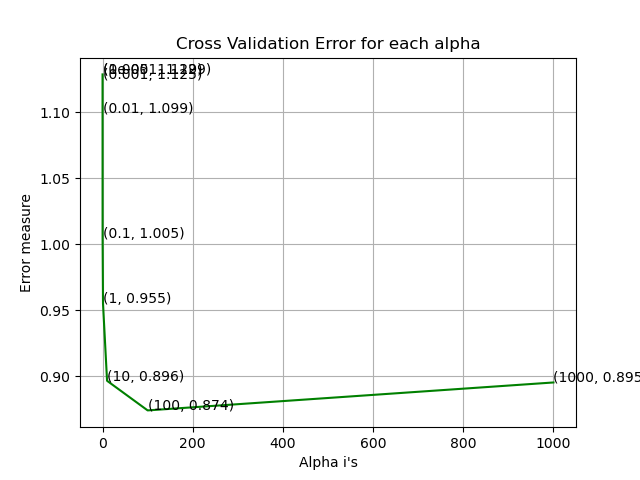

log loss for train data 0.8587269896439379
log loss for cv data 0.8739784212345719
log loss for test data 0.8535343575799331
Number of misclassified points  26.356945722171115
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


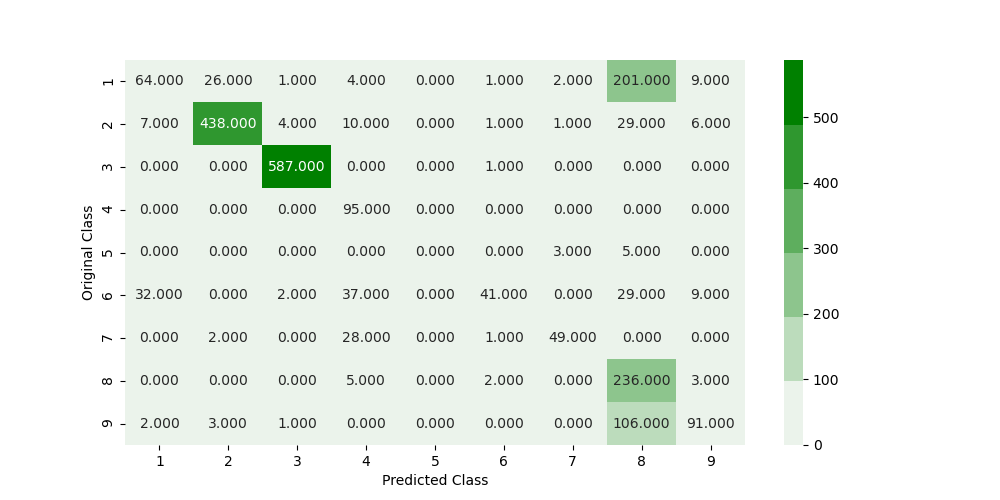

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


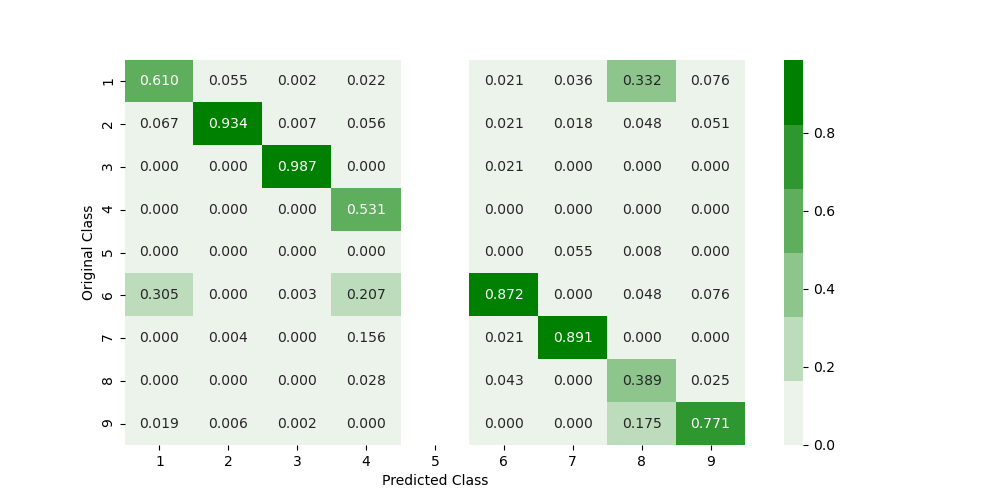

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


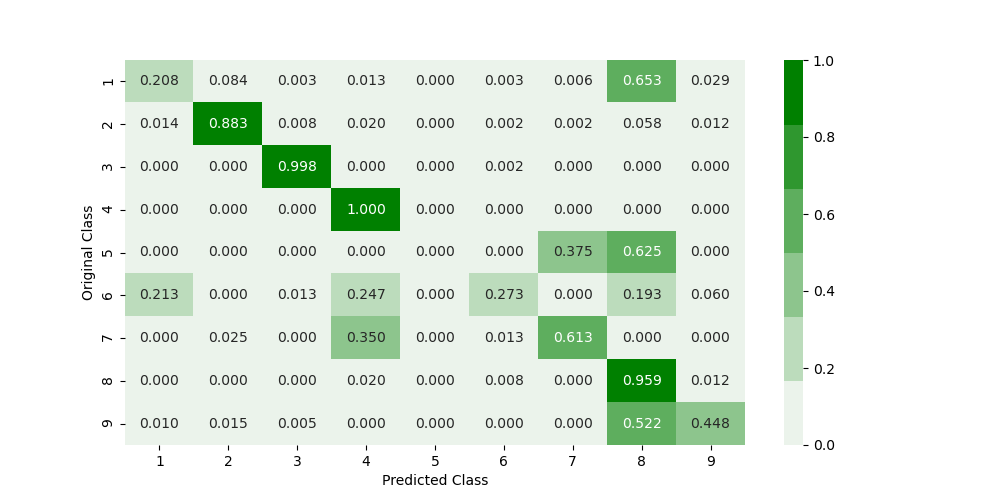

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 3min 46s, sys: 2min 22s, total: 6min 9s
Wall time: 46.9 s


In [26]:
%%time
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# Random Forest Classifier

log_loss for c =  10 is 0.09566379205451386
log_loss for c =  50 is 0.0849865210601143
log_loss for c =  100 is 0.08510814939891165
log_loss for c =  500 is 0.08537813558486984
log_loss for c =  1000 is 0.08549399800282101
log_loss for c =  2000 is 0.08546627922936105
log_loss for c =  3000 is 0.08555953247520783


<IPython.core.display.Javascript object>


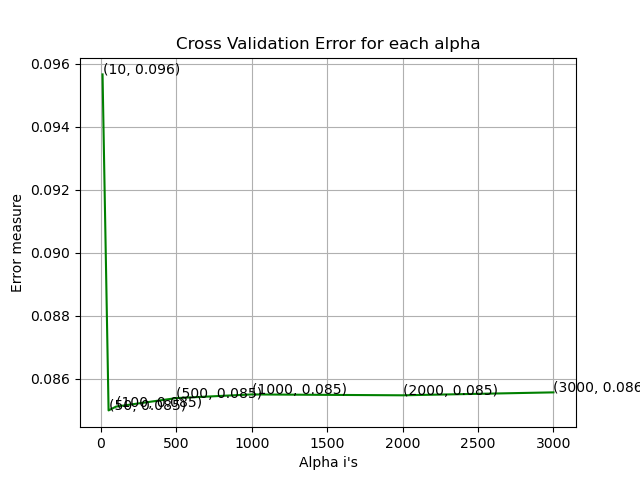

For values of best alpha =  50 The train log loss is: 0.027358323863858926
For values of best alpha =  50 The cross validation log loss is: 0.0849865210601143
For values of best alpha =  50 The test log loss is: 0.07762671415908319
Number of misclassified points  1.7939282428702852
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


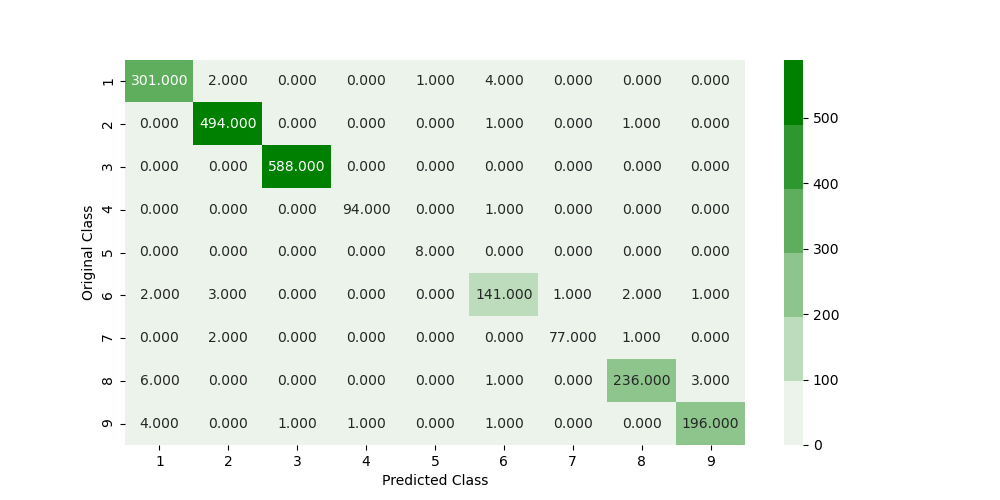

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


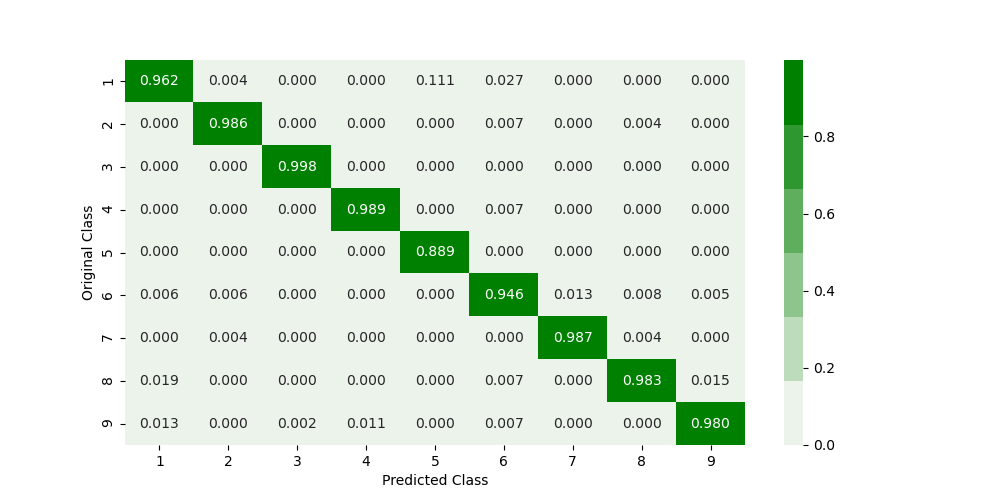

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


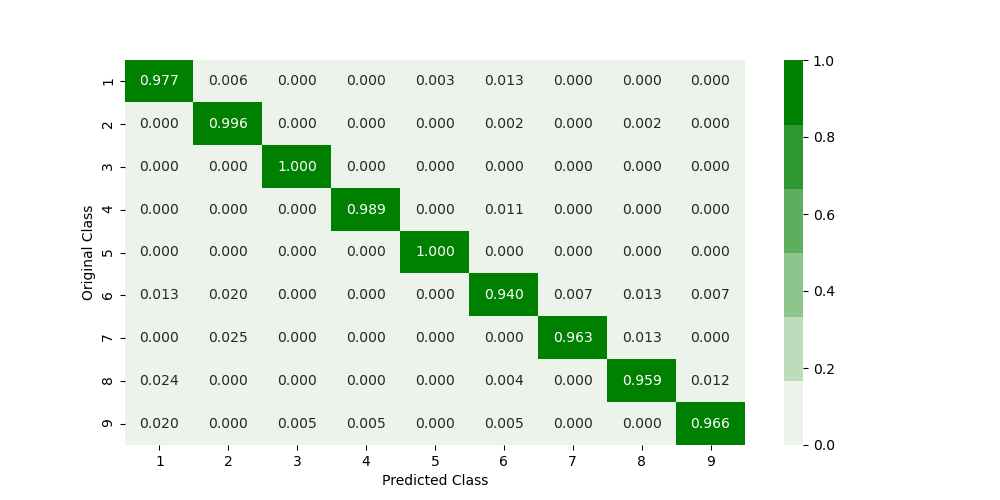

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 34min 2s, sys: 1.08 s, total: 34min 3s
Wall time: 34min 40s


In [31]:
%%time
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# XgBoost Classification

log_loss for c =  10 is 0.09301223975895716
log_loss for c =  50 is 0.08627918889389748
log_loss for c =  100 is 0.08665263458376225
log_loss for c =  500 is 0.08598067113685404
log_loss for c =  1000 is 0.08678162375758103
log_loss for c =  2000 is 0.08739674566813768


<IPython.core.display.Javascript object>


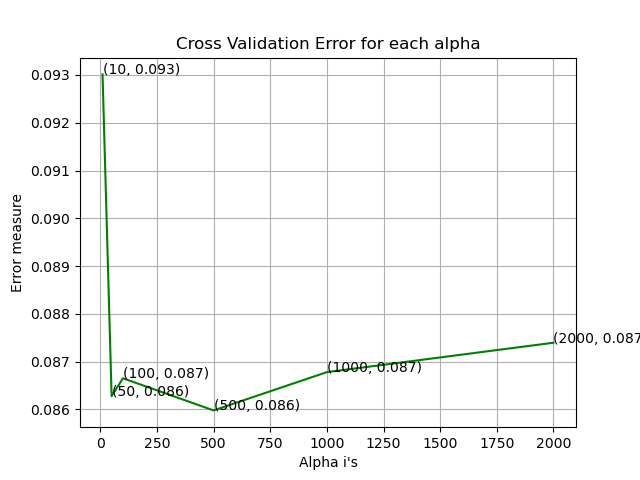

For values of best alpha =  500 The train log loss is: 0.023102025566669484
For values of best alpha =  500 The cross validation log loss is: 0.08598067113685404
For values of best alpha =  500 The test log loss is: 0.06371735476377081
Number of misclassified points  1.1499540018399264
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


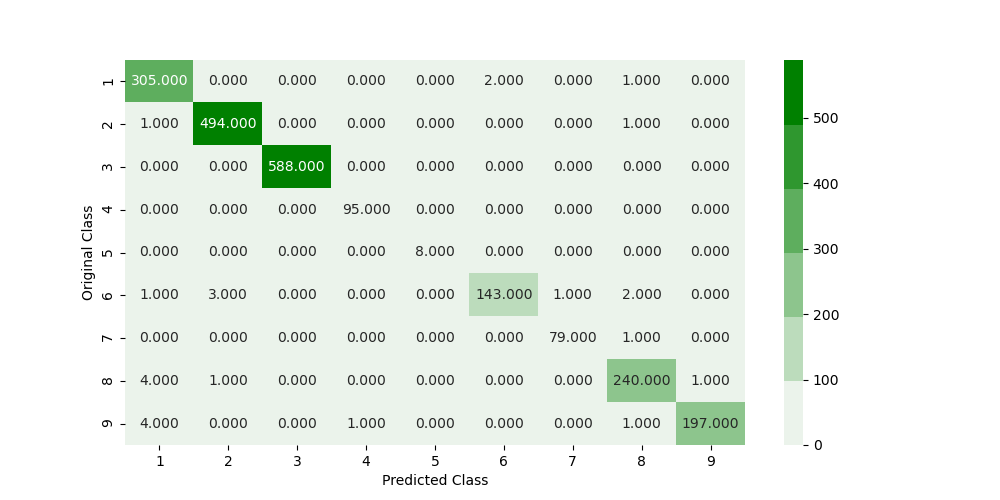

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


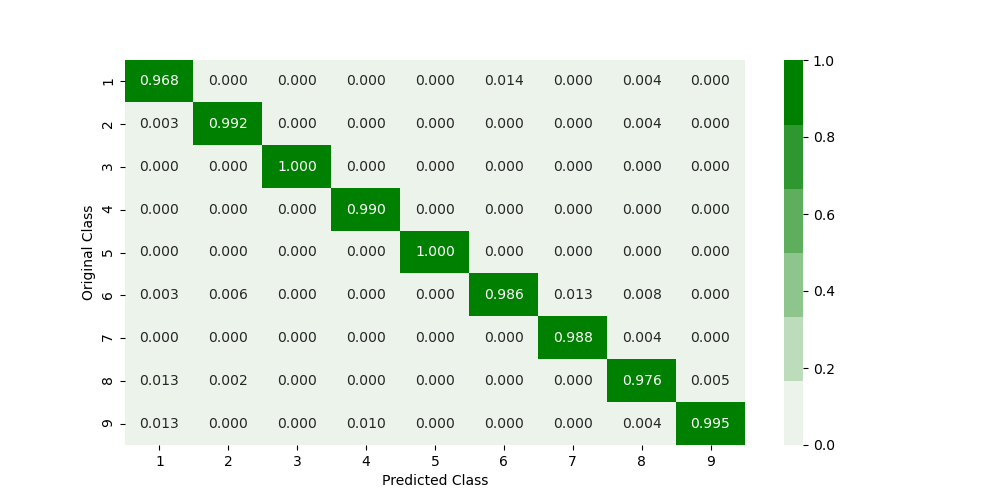

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


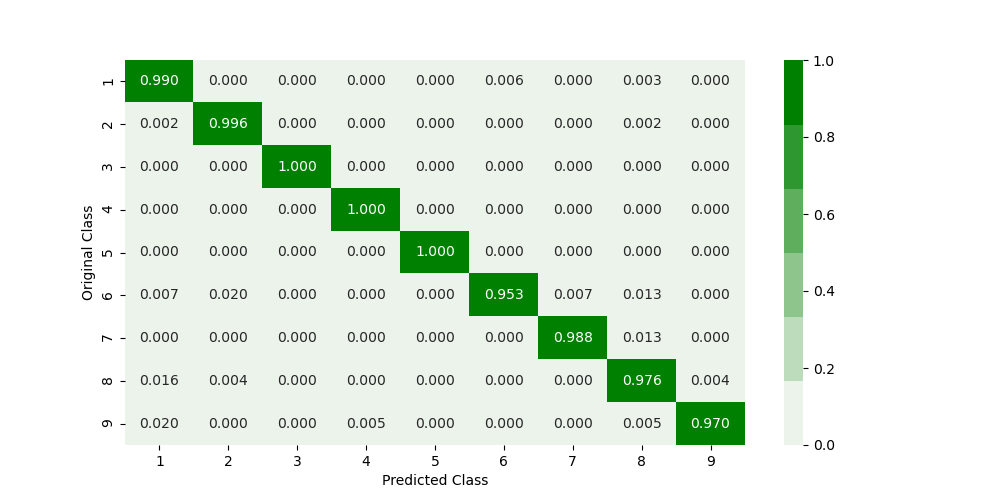

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 1h 47min 23s, sys: 2.82 s, total: 1h 47min 26s
Wall time: 1h 49min 25s


In [32]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------


alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1,eval_metric="merror")
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1,eval_metric="merror")
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# XgBoost Classification with best hyper parameters using RandomSearch

In [33]:
%%time
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier(eval_metric="merror")

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.1, colsample_bytree=0.3, score=0.976, total= 1.2min
[CV] subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.1, colsample_bytree=0.3, score=0.980, total= 1.2min
[CV] subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.1, colsample_bytree=0.3, score=0.983, total= 1.2min
[CV] subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.6min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.1, colsample_bytree=0.3, score=0.984, total= 1.2min
[CV] subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.8min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.1, colsample_bytree=0.3, score=0.979, total= 1.2min
[CV] subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.0min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=0.3, score=0.953, total=  21.6s
[CV] subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.4min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=0.3, score=0.958, total=  21.4s
[CV] subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  6.7min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=0.3, score=0.964, total=  21.7s
[CV] subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  7.1min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=0.3, score=0.968, total=  32.0s
[CV] subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  7.6min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=0.3, score=0.955, total=  21.4s
[CV] subsample=0.3, n_estimators=2000, max_depth=5, learning_rate=0.15, colsample_bytree=1 
[CV]  subsample=0.3, n_estimators=2000, max_depth=5, learning_rate=0.15, colsample_bytree=1, score=0.981, total= 5.3min
[CV] subsample=0.3, n_estimators=2000, max_depth=5, learning_rate=0.15, colsample_bytree=1 
[CV]  subsample=0.3, n_estimators=2000, max_depth=5, learning_rate=0.15, colsample_bytree=1, score=0.980, total= 5.5min
[CV] subsample=0.3, n_estimators=2000, max_depth=5, learning_rate=0.15, colsample_bytree=1 
[CV]  subsample=0.3, n_estimators=2000, max_depth=5, learning_rate=0.15, colsample_bytree=1, score=0.988, total= 5.4min
[CV] subsample=0.3, n_estimators=2000, max_depth=5, learning_rate=0.15, colsample_bytree=1 
[CV]  subsample=0.3, n_estimators=2000, max_depth=5, learning_rate=0.15, colsample_bytree=1, score=0.983, total= 5.6min
[CV] subsample=0.3, n_estimato

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 83.9min finished


CPU times: user 1h 26min 47s, sys: 5 s, total: 1h 26min 52s
Wall time: 1h 28min 17s


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='merror', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                   

In [34]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [85]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, max_depth=3, eval_metric="merror")
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.009557789083876635
cv loss 1.2263931094994291
test loss 1.2108344535515676
CPU times: user 25min 6s, sys: 943 ms, total: 25min 7s
Wall time: 25min 39s


# Feature extraction from asm files

In [35]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

### Files sizes of each .asm file 

In [36]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  hsRZLrea4Yk76V8SQlq9   3.684066      8
1  1TLN456WuaqCsDr9pv0z  12.492745      2
2  1UJIV2ntdkuWgzvFr4pm  13.276241      2
3  edyzYvJXM7oLhGwHE61D   5.022925      2
4  0IelgX5H2s14KutkEyNU   1.298869      9


### Distribution of .asm file sizes

<IPython.core.display.Javascript object>


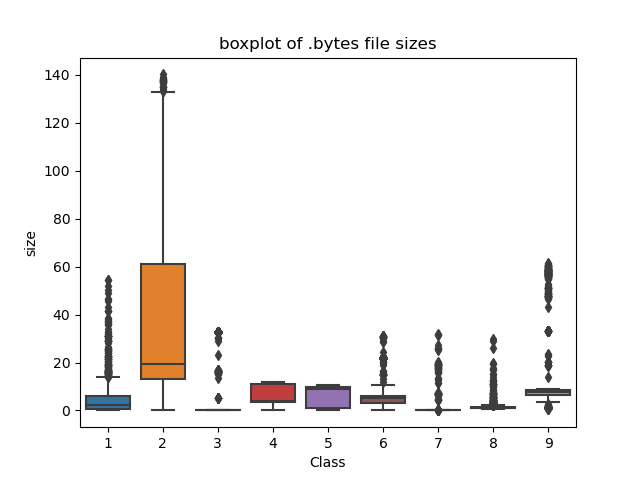

In [37]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [38]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [39]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

### Univariate analysis on asm file features

<IPython.core.display.Javascript object>


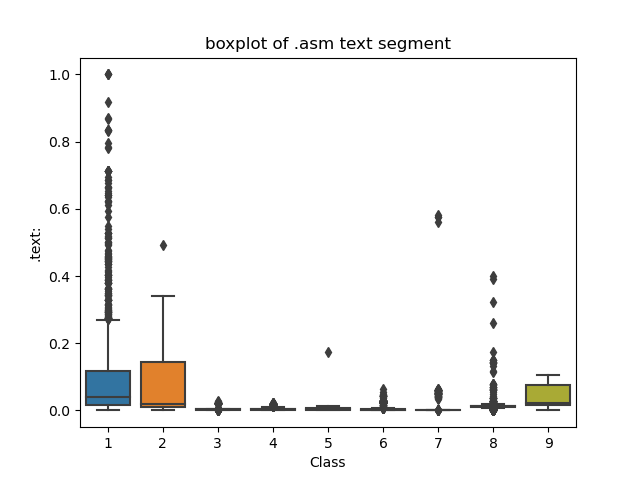

In [40]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<IPython.core.display.Javascript object>


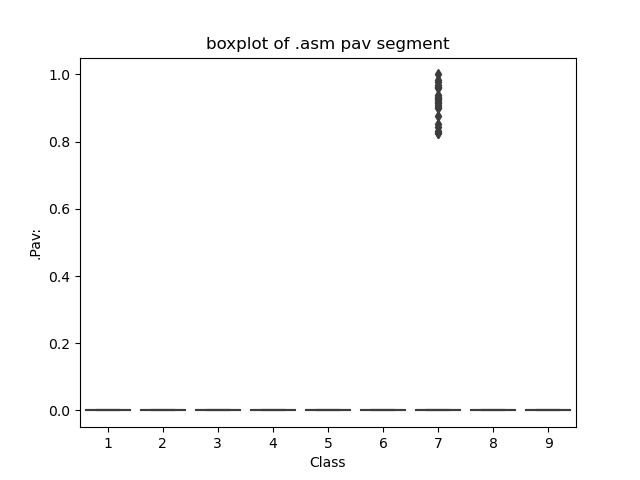

In [41]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


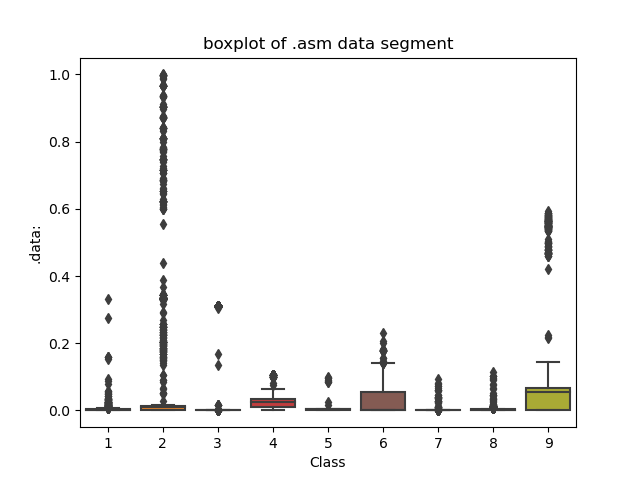

In [42]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<IPython.core.display.Javascript object>


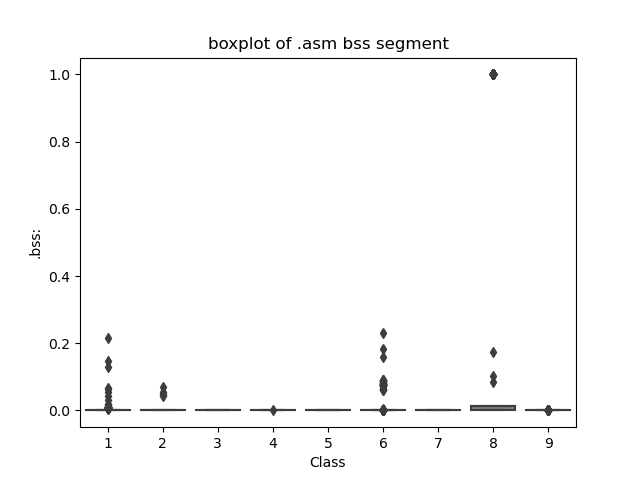

In [43]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<IPython.core.display.Javascript object>


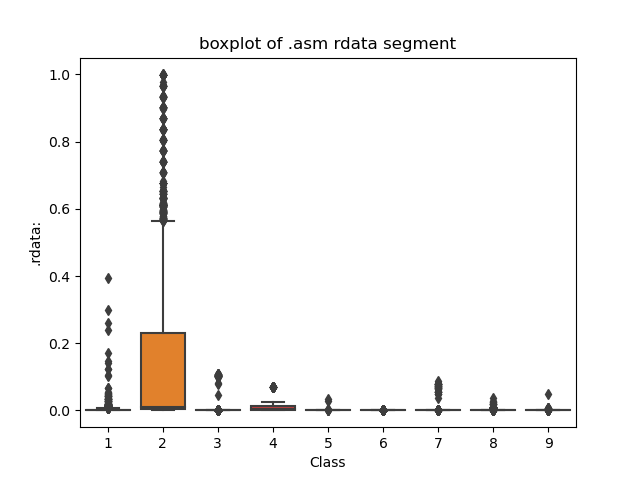

In [44]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<IPython.core.display.Javascript object>


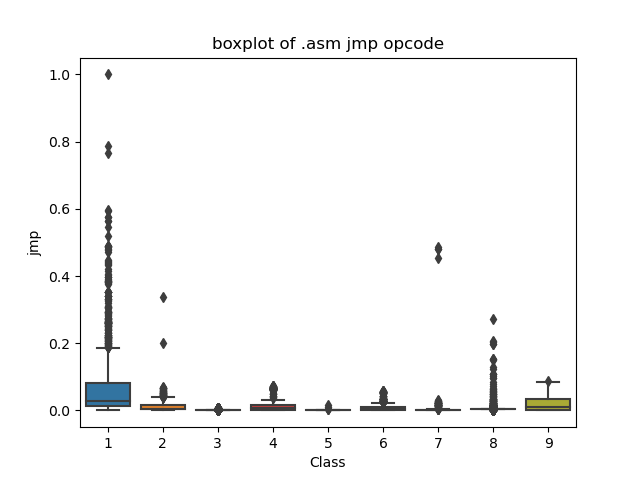

In [45]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<IPython.core.display.Javascript object>


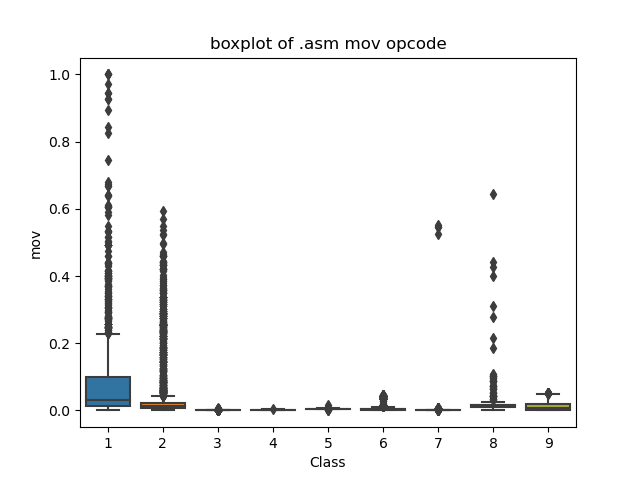

In [46]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<IPython.core.display.Javascript object>


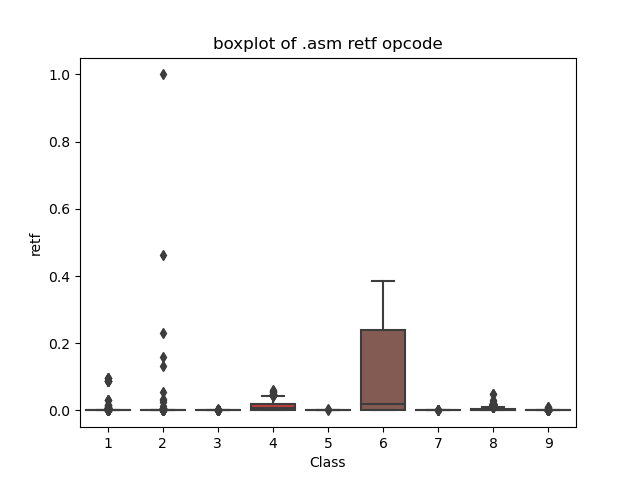

In [47]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<IPython.core.display.Javascript object>


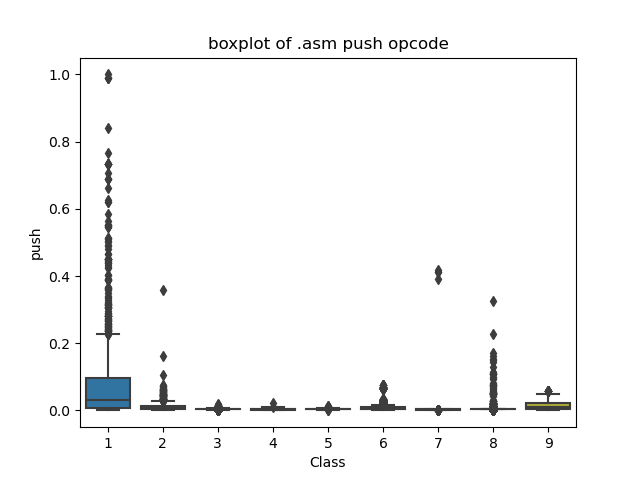

In [48]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

### Multivariate Analysis on .asm file features 

<IPython.core.display.Javascript object>


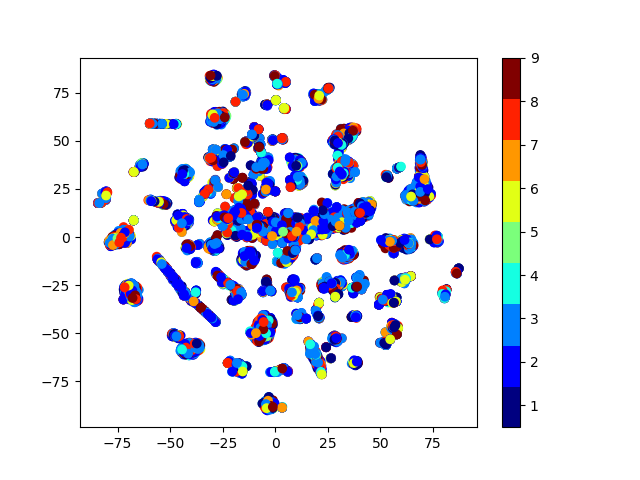

In [49]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


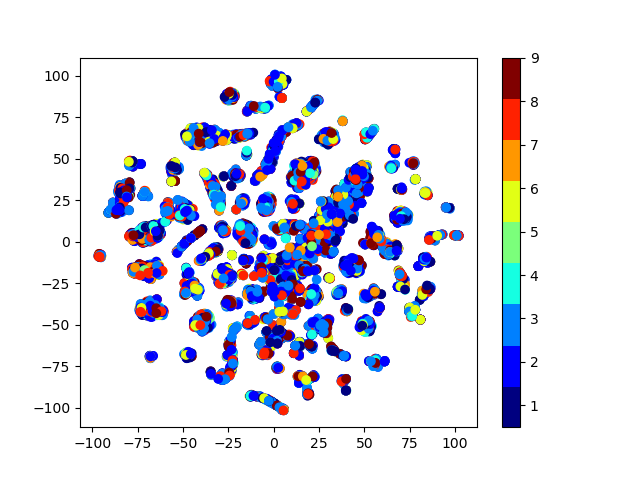

In [50]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

## Train and test split

In [51]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [52]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [53]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


## Machine Learning models on features of .asm files

### K-Nearest Neigbors

log_loss for k =  1 is 0.06615416225635755
log_loss for k =  3 is 0.06821445538290828
log_loss for k =  5 is 0.08072048310652409
log_loss for k =  7 is 0.09779921152151008
log_loss for k =  9 is 0.10991615676962477
log_loss for k =  11 is 0.11958303329518459
log_loss for k =  13 is 0.12754610917127748
log_loss for k =  15 is 0.13463423449593692
log_loss for k =  17 is 0.14067787750207883
log_loss for k =  19 is 0.14749262936112087


<IPython.core.display.Javascript object>


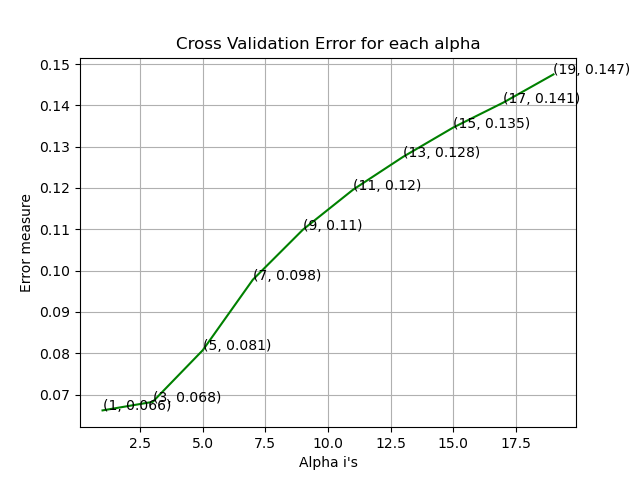

log loss for train data 0.027763888958544973
log loss for cv data 0.06615416225635755
log loss for test data 0.061087061271600344
Number of misclassified points  1.0579576816927323
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


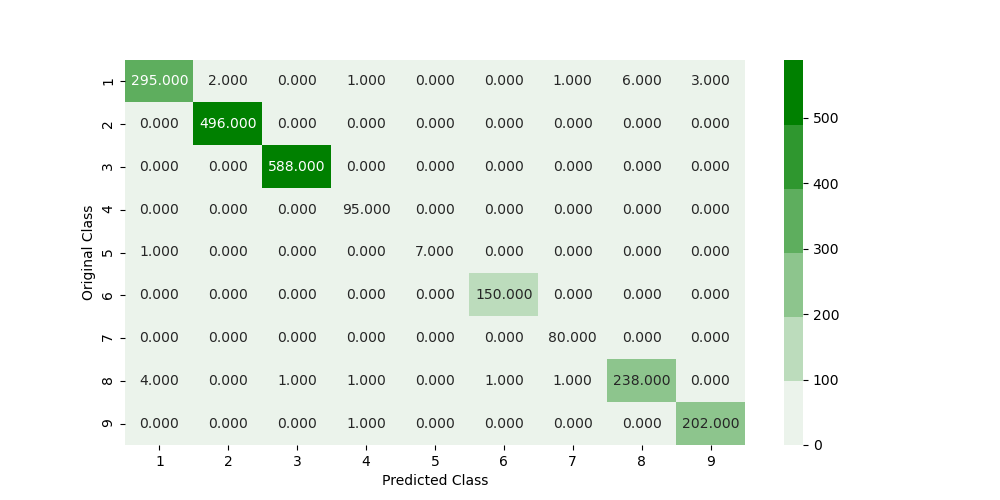

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


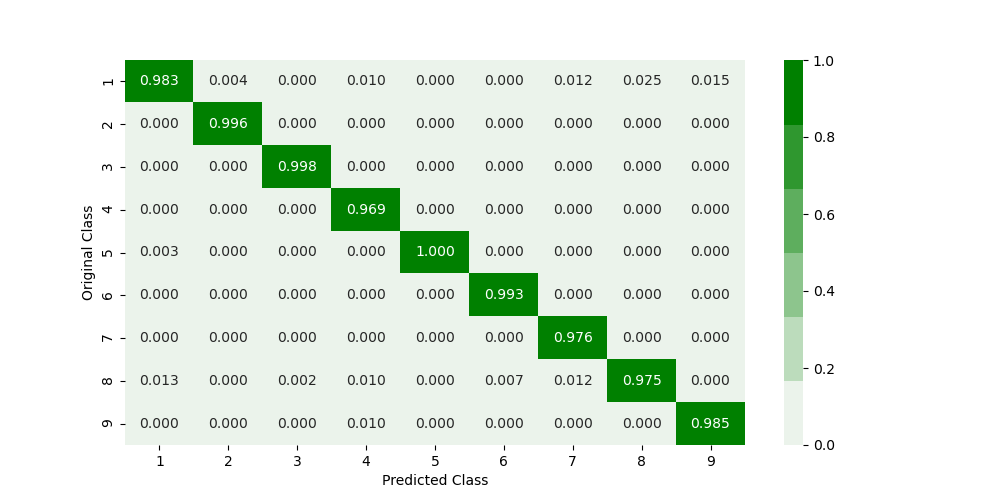

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


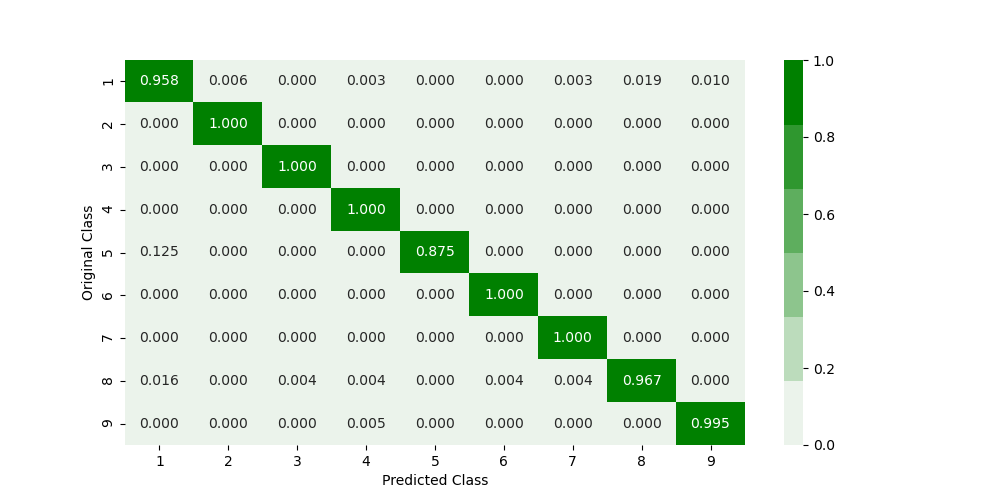

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 34.1 s, sys: 40.1 ms, total: 34.1 s
Wall time: 45.5 s


In [54]:
%%time
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

### Logistic Regression

log_loss for c =  1e-05 is 1.260531263033658
log_loss for c =  0.0001 is 1.2602803311837898
log_loss for c =  0.001 is 1.2573497915218412
log_loss for c =  0.01 is 1.2186440121445734
log_loss for c =  0.1 is 1.0248483399605448
log_loss for c =  1 is 1.194088876393891
log_loss for c =  10 is 1.2370576733336616
log_loss for c =  100 is 1.1711550748555597
log_loss for c =  1000 is 1.1641388297458177


<IPython.core.display.Javascript object>


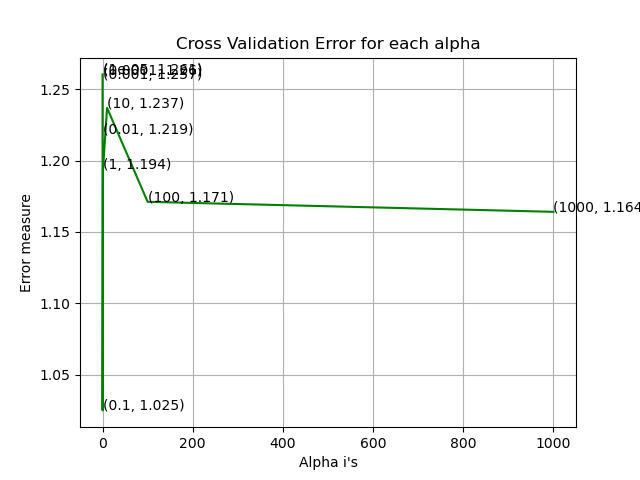

log loss for train data 1.0431759579460007
log loss for cv data 1.0248483399605448
log loss for test data 1.0652759186901741
Number of misclassified points  29.85280588776449
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


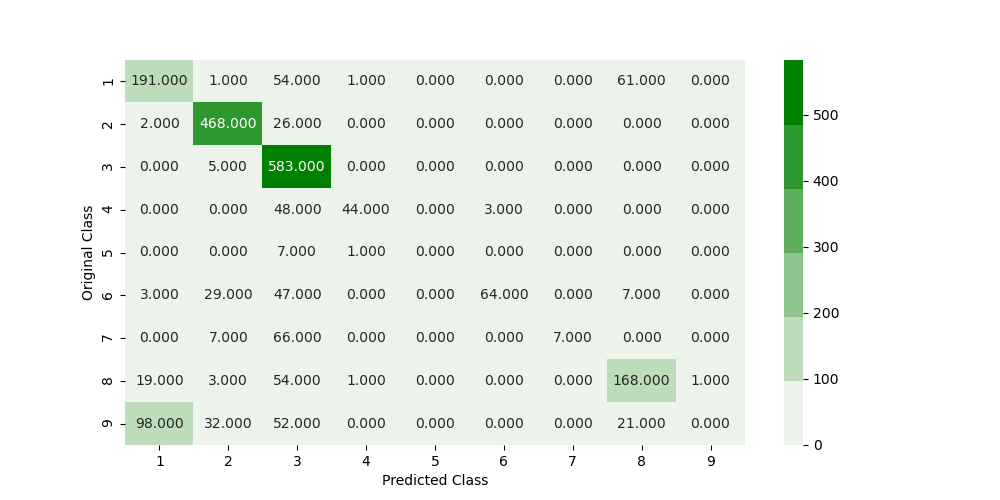

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


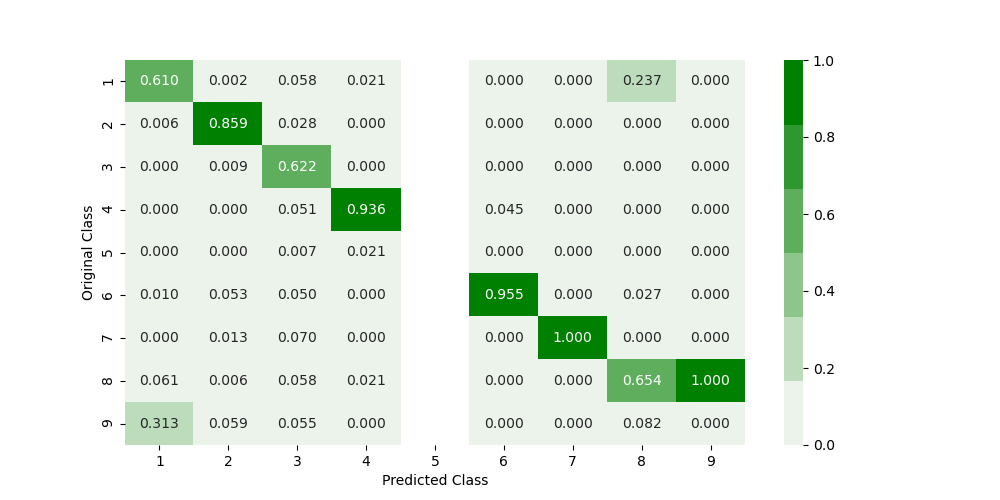

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


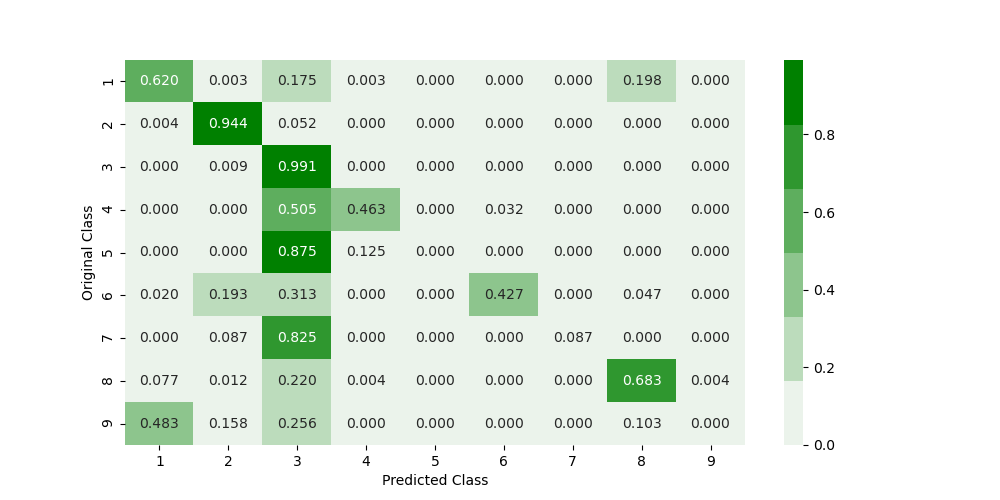

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 2min 18s, sys: 1min 55s, total: 4min 13s
Wall time: 32.4 s


In [55]:
%%time
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

### Random Forest Classifier

log_loss for c =  10 is 0.02476241220682328
log_loss for c =  50 is 0.022421493911827184
log_loss for c =  100 is 0.022139522293109035
log_loss for c =  500 is 0.022271484964443432
log_loss for c =  1000 is 0.022183038069011327
log_loss for c =  2000 is 0.02213826211919259
log_loss for c =  3000 is 0.022167315380668427


<IPython.core.display.Javascript object>


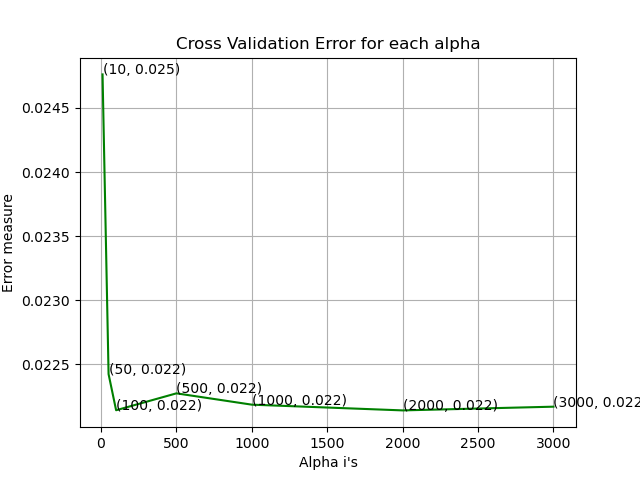

log loss for train data 0.016326075534896987
log loss for cv data 0.02213826211919259
log loss for test data 0.02919883702605194
Number of misclassified points  0.5059797608095675
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


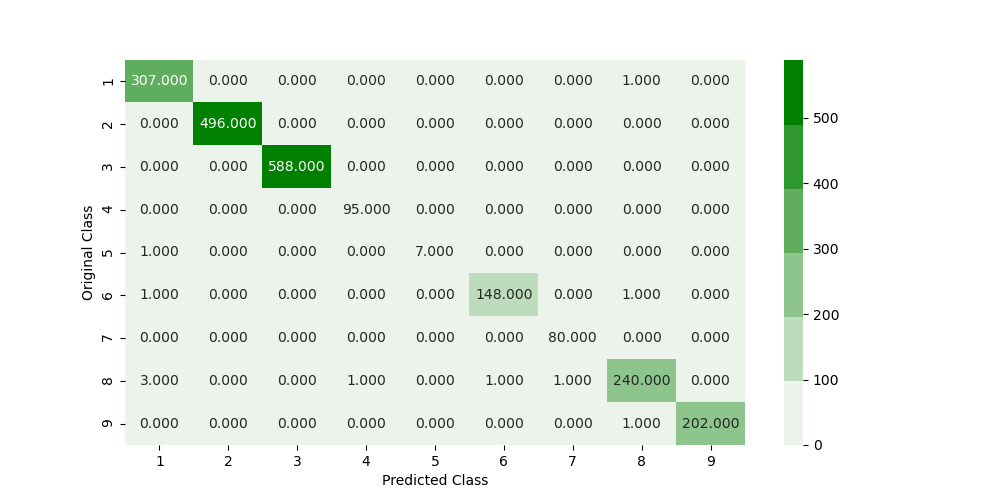

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


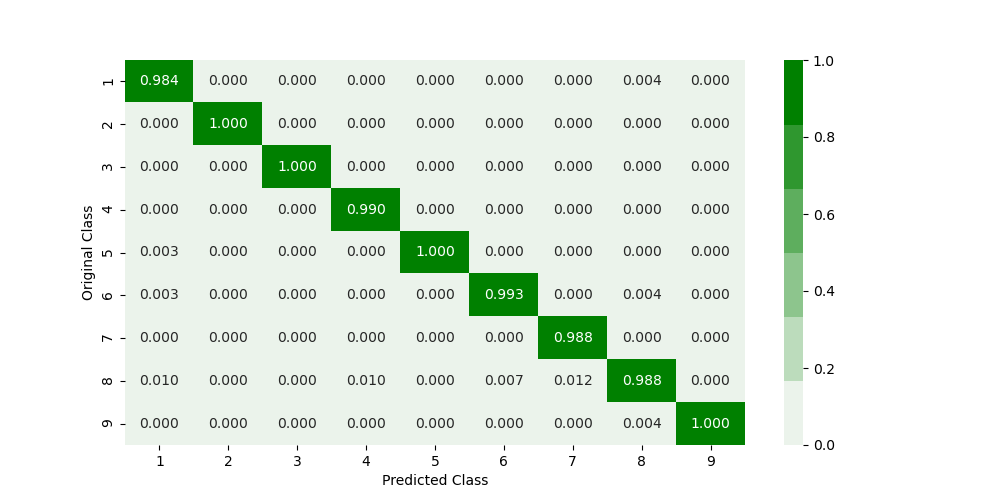

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


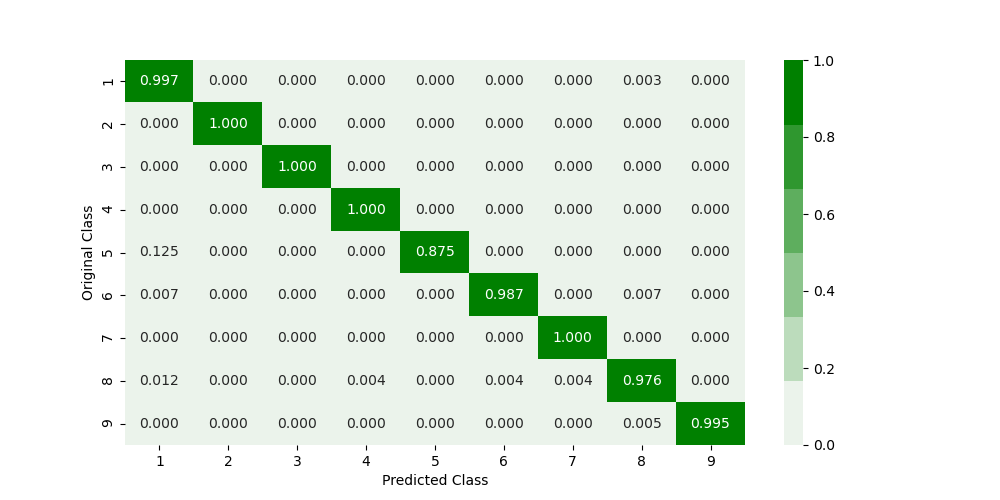

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 11min 10s, sys: 1.28 s, total: 11min 11s
Wall time: 11min 22s


In [56]:
%%time
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

## XgBoost Classifier

log_loss for c =  10 is 0.034614327266429865
log_loss for c =  50 is 0.018575585763496126
log_loss for c =  100 is 0.018153372136137207
log_loss for c =  500 is 0.017851524675392784
log_loss for c =  1000 is 0.017745757431638004
log_loss for c =  2000 is 0.017869797384903643
log_loss for c =  3000 is 0.01786817100820238


<IPython.core.display.Javascript object>


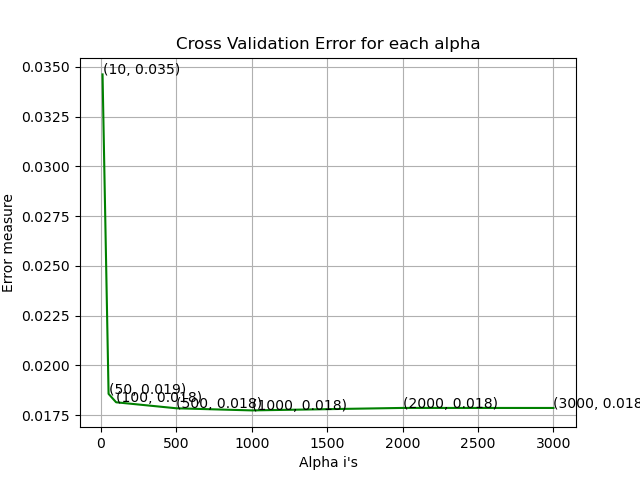

For values of best alpha =  1000 The train log loss is: 0.013638782680459212
For values of best alpha =  1000 The cross validation log loss is: 0.017745757431638004
For values of best alpha =  1000 The test log loss is: 0.025865093932305662
Number of misclassified points  0.36798528058877644
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


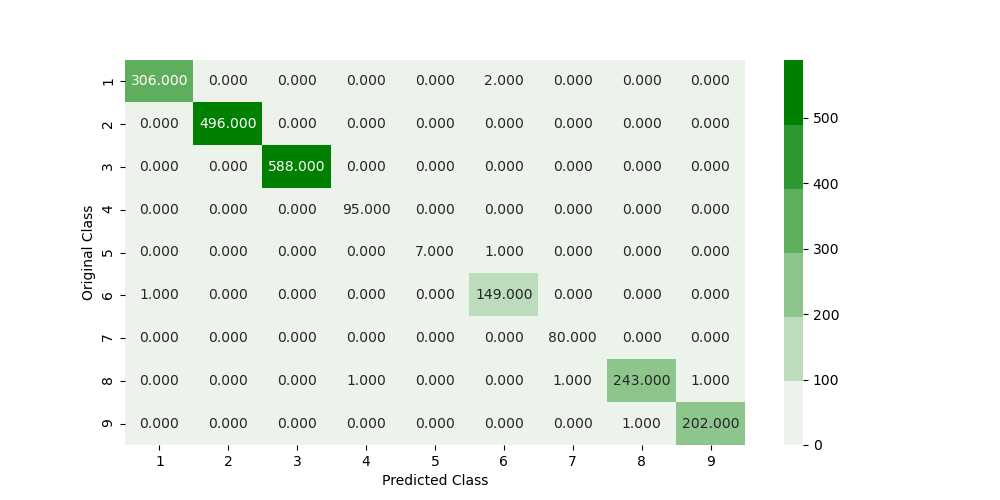

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


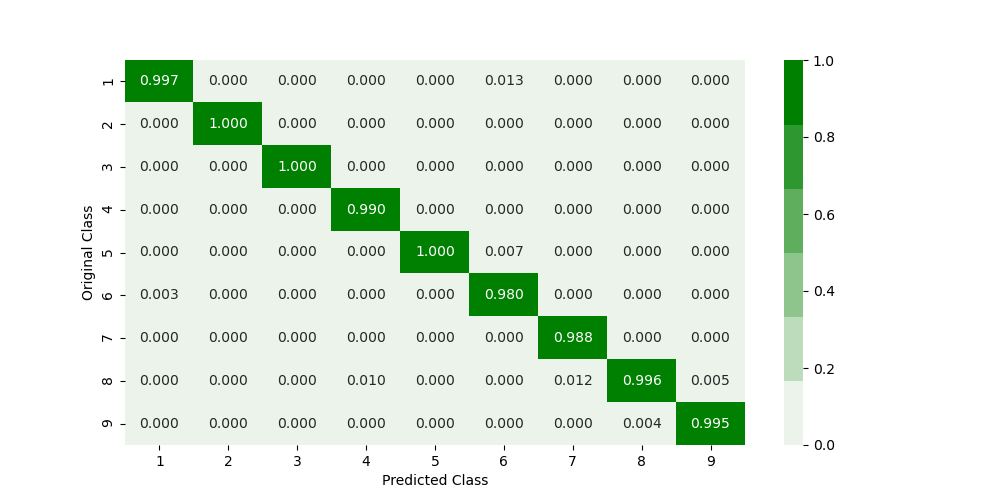

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


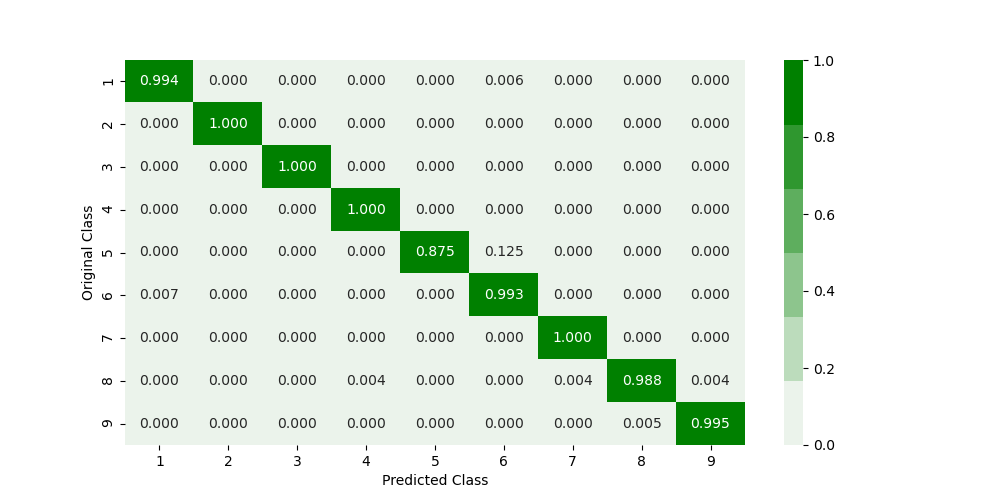

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 24min 56s, sys: 2.08 s, total: 24min 58s
Wall time: 25min 20s


In [57]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1,eval_metric="merror")
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1,eval_metric="merror")
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

## Xgboost Classifier with best hyperparameters

In [58]:
%%time
x_cfl=XGBClassifier(eval_metric="merror")

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.1, n_estimators=200, max_depth=3, learning_rate=0.01, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.1, n_estimators=200, max_depth=3, learning_rate=0.01, colsample_bytree=0.3, score=0.976, total=   3.3s
[CV] subsample=0.1, n_estimators=200, max_depth=3, learning_rate=0.01, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=3, learning_rate=0.01, colsample_bytree=0.3, score=0.978, total=   3.3s
[CV] subsample=0.1, n_estimators=200, max_depth=3, learning_rate=0.01, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=3, learning_rate=0.01, colsample_bytree=0.3, score=0.986, total=   3.3s
[CV] subsample=0.1, n_estimators=200, max_depth=3, learning_rate=0.01, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.0s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=3, learning_rate=0.01, colsample_bytree=0.3, score=0.973, total=   3.3s
[CV] subsample=0.1, n_estimators=200, max_depth=3, learning_rate=0.01, colsample_bytree=0.3 


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   13.3s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=3, learning_rate=0.01, colsample_bytree=0.3, score=0.983, total=   3.3s
[CV] subsample=1, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1 


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s remaining:    0.0s


[CV]  subsample=1, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1, score=0.984, total=  13.5s
[CV] subsample=1, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1 


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   30.0s remaining:    0.0s


[CV]  subsample=1, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1, score=0.989, total=  13.5s
[CV] subsample=1, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1 


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   43.6s remaining:    0.0s


[CV]  subsample=1, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1, score=0.990, total=  13.7s
[CV] subsample=1, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1 


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   57.3s remaining:    0.0s


[CV]  subsample=1, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1, score=0.986, total=  13.5s
[CV] subsample=1, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1 


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.2min remaining:    0.0s


[CV]  subsample=1, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1, score=0.992, total=  13.3s
[CV] subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.5 
[CV]  subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.5, score=0.988, total=   3.7s
[CV] subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.5 
[CV]  subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.5, score=0.992, total=   3.9s
[CV] subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.5 
[CV]  subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.5, score=0.994, total=   3.8s
[CV] subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.5 
[CV]  subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.5, score=0.988, total=   3.7s
[CV] subsample=0.3, n_estimators=10

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.6min finished


CPU times: user 10min 1s, sys: 1.39 s, total: 10min 2s
Wall time: 10min 13s


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='merror', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                   

In [59]:
print (random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [86]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,subsample=0.5,learning_rate=0.1,colsample_bytree=0.5,max_depth=10,eval_metric="merror")
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.013562279487898567
cv loss 0.016525146655961977
test loss 0.025076841711888235
CPU times: user 3min 3s, sys: 350 ms, total: 3min 3s
Wall time: 3min 3s


# Machine Learning models on features of both .asm and .bytes files

### Merging both asm and byte file features

In [60]:
result.head()

ID         0         1         2         3         4  \
0  6VTkgzifPd5Z0BXF3cuY  0.161104  0.019090  0.007496  0.006041  0.008032   
1  fQs8jHrye30NE6KMP9RO  0.028810  0.003399  0.001044  0.001094  0.001350   
2  0GvtWEPUBfDAcMbiYVSR  0.004640  0.007754  0.001802  0.001820  0.001993   
3  1T0BWPoJVtNFzsycKhlr  0.028135  0.003207  0.000977  0.001086  0.001399   
4  KHQJDZ7toAnaeLSifmIv  0.009449  0.001012  0.000139  0.000243  0.000357   

          5         6         7         8  ...        f9        fa        fb  \
0  0.008660  0.008329  0.009904  0.012845  ...  0.000756  0.000551  0.000599   
1  0.000916  0.000930  0.001537  0.001905  ...  0.007141  0.006482  0.006889   
2  0.001888  0.001777  0.003079  0.002909  ...  0.013704  0.012899  0.014497   
3  0.000895  0.000929  0.001529  0.001945  ...  0.006423  0.006050  0.006639   
4  0.000217  0.000150  0.000240  0.000353  ...  0.001220  0.001098  0.001197   

         fc        fd        fe        ff        ??      size  Class  
0  0.123605  0.000812  0.080860  0.083009  0.000383  0.155844      2  
1  0.020371  0.007263  0.009766  0.006460  0.001890  0.035250      6  
2  0.036750  0.015507  0.016584  0.009301  0.105263  0.150254      3  
3  0.020486  0.007023  0.008721  0.006199  0.002035  0.035250      6  
4  0.008063  0.001131  0.001482  0.002540  0.000636  0.006233      8  

[5 rows x 260 columns]

In [61]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

In [62]:
print(result.shape)
print(result_asm.shape)

(10868, 260)
(10868, 54)


In [63]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.161104  0.019090  0.007496  0.006041  0.008032  0.008660  0.008329   
1  0.028810  0.003399  0.001044  0.001094  0.001350  0.000916  0.000930   
2  0.004640  0.007754  0.001802  0.001820  0.001993  0.001888  0.001777   
3  0.028135  0.003207  0.000977  0.001086  0.001399  0.000895  0.000929   
4  0.009449  0.001012  0.000139  0.000243  0.000357  0.000217  0.000150   

          7         8         9  ...       edx       esi       eax       ebx  \
0  0.009904  0.012845  0.000458  ...  0.002595  0.003785  0.003075  0.003179   
1  0.001537  0.001905  0.001833  ...  0.019387  0.015163  0.026086  0.017784   
2  0.003079  0.002909  0.003627  ...  0.001584  0.000949  0.003517  0.001271   
3  0.001529  0.001945  0.001862  ...  0.021925  0.016203  0.026528  0.019298   
4  0.000240  0.000353  0.000259  ...  0.000363  0.013774  0.000502  0.012932   

        ecx  edi       ebp  esp       eip    size_y  
0  0.000739  0.0  0.039855  0.0  0.022212  0.113634  
1  0.008115  0.0  0.007246  0.0  0.004267  0.154334  
2  0.002319  0.0  0.021739  0.0  0.004267  0.001028  
3  0.008077  0.0  0.007246  0.0  0.004049  0.155154  
4  0.001287  0.0  0.027174  0.0  0.008316  0.007069  

[5 rows x 307 columns]

### Multivariate Analysis on final fearures

<IPython.core.display.Javascript object>


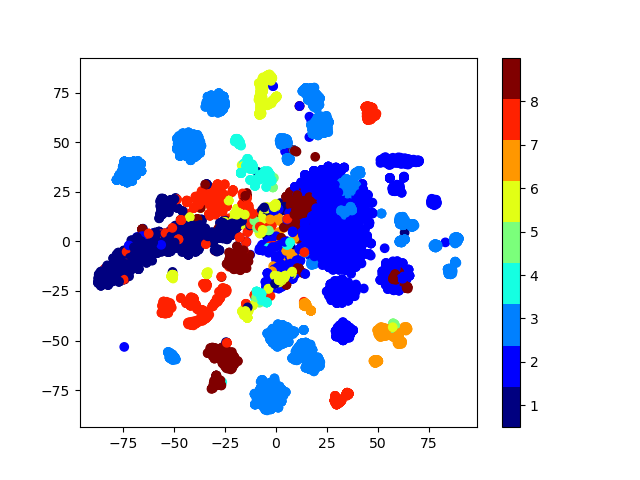

In [64]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

# Train and Test split

In [65]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

### Random Forest Classifier on final features

log_loss for c =  10 is 0.05985951600309562
log_loss for c =  50 is 0.050813005349526055
log_loss for c =  100 is 0.05110872951653562
log_loss for c =  500 is 0.05080986574065357
log_loss for c =  1000 is 0.050387235378859196
log_loss for c =  2000 is 0.05017998412266124
log_loss for c =  3000 is 0.05018204912694901


<IPython.core.display.Javascript object>


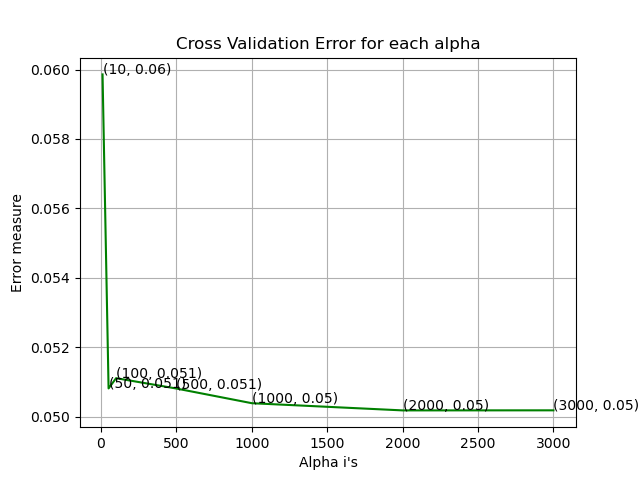

For values of best alpha =  2000 The train log loss is: 0.015407815268232292
For values of best alpha =  2000 The cross validation log loss is: 0.05017998412266124
For values of best alpha =  2000 The test log loss is: 0.05907522094099349
CPU times: user 39min 8s, sys: 1.8 s, total: 39min 10s
Wall time: 39min 54s


In [66]:
%%time
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

### XgBoost Classifier on final features

log_loss for c =  10 is 0.054362351704522596
log_loss for c =  50 is 0.04045136061986301
log_loss for c =  100 is 0.03916658467498288
log_loss for c =  500 is 0.03658752368622741
log_loss for c =  1000 is 0.03665298274752128
log_loss for c =  2000 is 0.036654081396002625
log_loss for c =  3000 is 0.03665398076337292


<IPython.core.display.Javascript object>


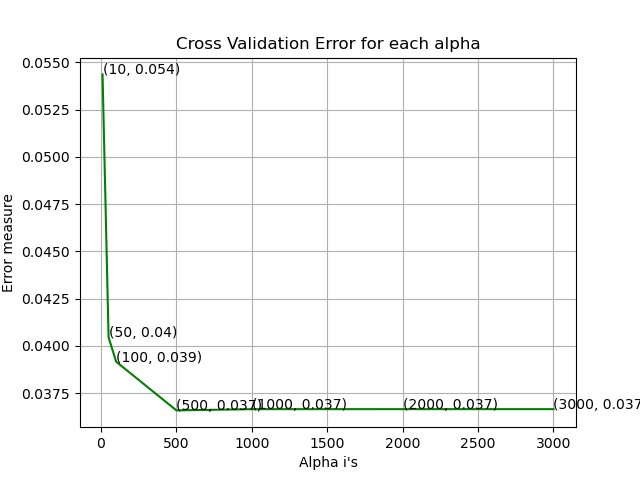

For values of best alpha =  500 The train log loss is: 0.0115423460075732
For values of best alpha =  500 The cross validation log loss is: 0.03665398076337292
For values of best alpha =  500 The test log loss is: 0.043558603388858363
CPU times: user 2h 55min 57s, sys: 4.67 s, total: 2h 56min 1s
Wall time: 2h 59min 30s


In [70]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,eval_metric="merror")
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1,eval_metric="merror")
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

### XgBoost Classifier on final features with best hyper parameters using Random search

In [68]:
%%time
x_cfl=XGBClassifier(eval_metric="merror")

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.1 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.1, score=0.991, total=   6.2s
[CV] subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.1 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV]  subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.1, score=0.988, total=   6.1s
[CV] subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.1 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.3s remaining:    0.0s


[CV]  subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.1, score=0.993, total=   6.0s
[CV] subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.1 


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.3s remaining:    0.0s


[CV]  subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.1, score=0.993, total=  10.8s
[CV] subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.1 


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   29.1s remaining:    0.0s


[CV]  subsample=0.3, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.1, score=0.991, total=  11.1s
[CV] subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.1s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05, colsample_bytree=0.5, score=0.993, total=  37.2s
[CV] subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05, colsample_bytree=0.5, score=0.988, total=  37.1s
[CV] subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  1.9min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05, colsample_bytree=0.5, score=0.993, total=  37.0s
[CV] subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  2.5min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05, colsample_bytree=0.5, score=0.992, total=  37.1s
[CV] subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.1min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=100, max_depth=3, learning_rate=0.05, colsample_bytree=0.5, score=0.991, total=  37.0s
[CV] subsample=0.5, n_estimators=200, max_depth=3, learning_rate=0.2, colsample_bytree=0.3 
[CV]  subsample=0.5, n_estimators=200, max_depth=3, learning_rate=0.2, colsample_bytree=0.3, score=0.994, total=  25.7s
[CV] subsample=0.5, n_estimators=200, max_depth=3, learning_rate=0.2, colsample_bytree=0.3 
[CV]  subsample=0.5, n_estimators=200, max_depth=3, learning_rate=0.2, colsample_bytree=0.3, score=0.994, total=  25.8s
[CV] subsample=0.5, n_estimators=200, max_depth=3, learning_rate=0.2, colsample_bytree=0.3 
[CV]  subsample=0.5, n_estimators=200, max_depth=3, learning_rate=0.2, colsample_bytree=0.3, score=0.996, total=  25.6s
[CV] subsample=0.5, n_estimators=200, max_depth=3, learning_rate=0.2, colsample_bytree=0.3 
[CV]  subsample=0.5, n_estimators=200, max_depth=3, learning_rate=0.2, colsample_bytree=0.3, score=0.995, total=  26.8s
[CV] subsample=0.5, n_estimator

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 129.9min finished


CPU times: user 2h 11min 12s, sys: 3.39 s, total: 2h 11min 16s
Wall time: 2h 13min 39s


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='merror', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                   

In [69]:
print (random_cfl.best_params_)

{'subsample': 0.3, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 1}


For values of best alpha =  500 The train log loss is: 0.012222483541446567
For values of best alpha =  500 The cross validation log loss is: 0.03631901163055306
For values of best alpha =  500 The test log loss is: 0.04326120785377689
Number of misclassified points  82.56669733210671
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


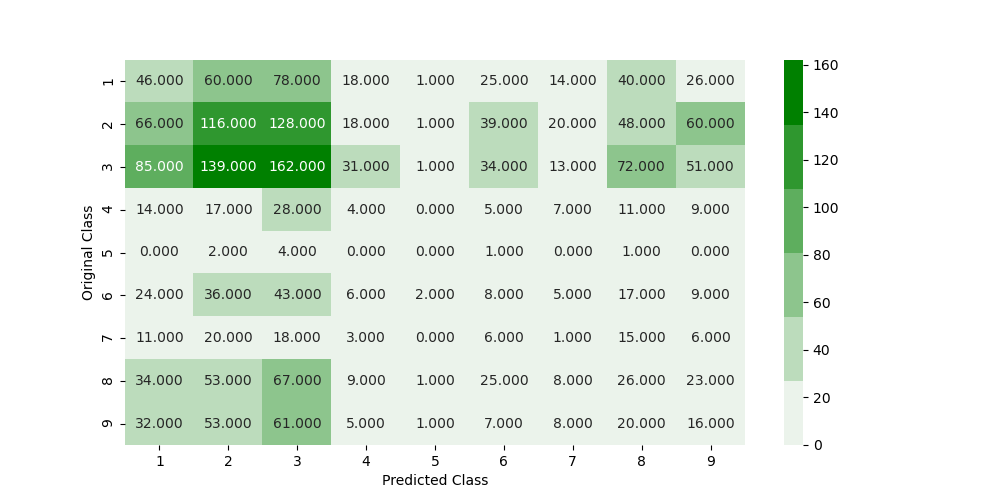

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


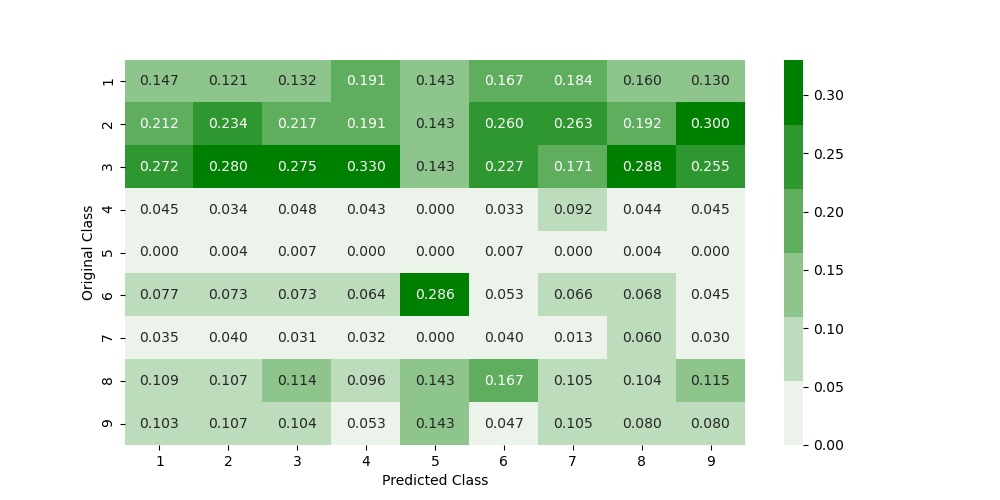

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


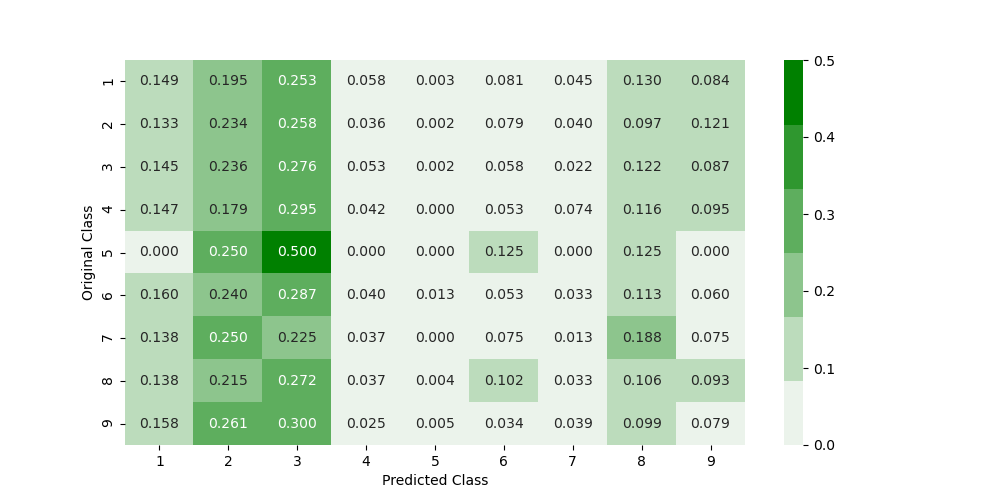

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 18min 42s, sys: 778 ms, total: 18min 43s
Wall time: 19min 5s


In [87]:
%%time
# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.15,colsample_bytree=1,subsample=0.3,nthread=-1,eval_metric="merror")
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

# Bigram

In [71]:
result_x['ID'] = result.ID

In [72]:
byte_vocab = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"

In [97]:
# def byte_bigram():    
byte_bigram_vocab = []
for i, v in enumerate(byte_vocab.split(',')):
    for j in range(0, len(byte_vocab.split(','))):
        byte_bigram_vocab.append(v + ' ' +byte_vocab.split(',')[j])
len(byte_bigram_vocab)

66049

In [98]:
byte_bigram_vocab[:5]

['00 00', '00 01', '00 02', '00 03', '00 04']

In [99]:
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
import scipy
vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=byte_bigram_vocab)
bytebigram_vect = scipy.sparse.csr_matrix((10868, 66049))
for i, file in tqdm(enumerate(os.listdir('byteFiles'))):
    f = open('byteFiles/' + file)
    bytebigram_vect[i]= scipy.sparse.csr_matrix(vector.fit_transform([f.read().replace('\n', ' ').lower()]))
    f.close()

10868it [42:00:25, 13.91s/it]


In [110]:
bytebigram_vect

<10868x66049 sparse matrix of type '<class 'numpy.float64'>'
	with 215403760 stored elements in Compressed Sparse Row format>

In [111]:
scipy.sparse.save_npz('bytebigram.npz', bytebigram_vect)

In [112]:
from sklearn.preprocessing import normalize
byte_bigram_vect = normalize(scipy.sparse.load_npz('bytebigram.npz'), axis = 0)

# Image Feature Extraction From ASM Files

In [118]:
import array
import imageio

In [141]:

def collect_img_asm():
    for asmfile in os.listdir("asmFiles"):
        filename = asmfile.split('.')[0]
        file = codecs.open("asmFiles/" + asmfile, 'rb')
        filelen = os.path.getsize("asmFiles/" + asmfile)
        width = int(filelen ** 0.5)
        rem = int(filelen / width)
        arr = array.array('B')
        arr.frombytes(file.read())
        file.close()
        reshaped = np.reshape(arr[:width * width], (width, width))
        reshaped = np.uint8(reshaped)
        imageio.imwrite('asm_image' + filename + '.png',reshaped)

In [152]:
%%time
collect_img_asm()

CPU times: user 2h 40min 4s, sys: 5min 48s, total: 2h 45min 53s
Wall time: 3h 7min 32s


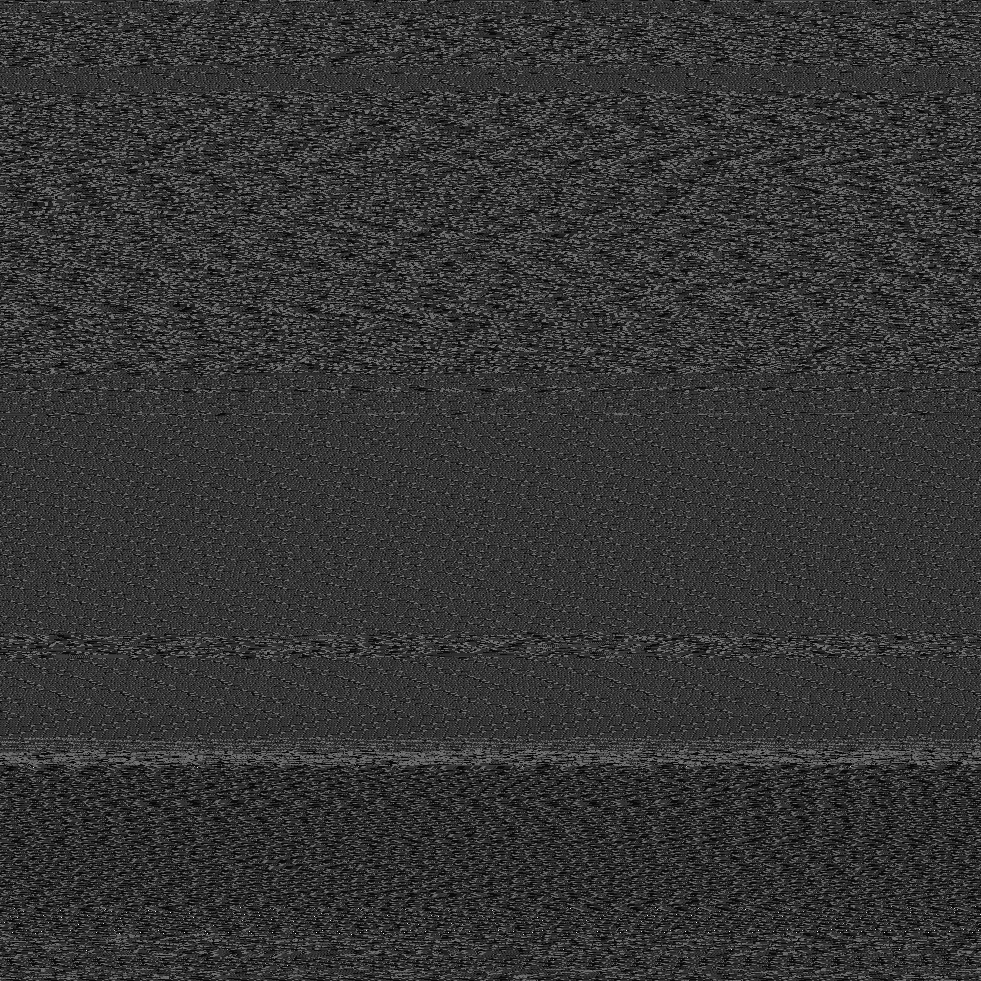

In [153]:
from IPython.display import Image 
Image(filename='asm_image2cf8jvWxmkMu6s10zbqN.png')

# First 800 Image Pixels

In [196]:
import cv2
imagefeatures = np.zeros((10868, 800))

In [151]:

img = cv2.imread('asm_image2cf8jvWxmkMu6s10zbqN.png')
img_arr = img.flatten()[:200]
imagefeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [197]:
%%time
for i, asmfile in enumerate(os.listdir("asmFiles")):
    img = cv2.imread("asm_image" + asmfile.split('.')[0] + '.png')
    img_arr = img.flatten()[:800]
    imagefeatures[i, :] += img_arr

CPU times: user 18min 1s, sys: 4min 39s, total: 22min 40s
Wall time: 22min 50s


In [198]:
img_features_name = []
for i in range(800):
    img_features_name.append('pix' + str(i))
imgdf = pd.DataFrame(normalize(imagefeatures, axis = 0), columns = img_features_name)

In [199]:
imgdf['ID'] = result.ID

In [200]:
imgdf.head()

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
1  0.006560  0.006560  0.006560  0.014203  0.014203  0.014203  0.012927   
2  0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
3  0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
4  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   

       pix7      pix8      pix9  ...    pix791    pix792    pix793    pix794  \
0  0.008320  0.008320  0.007913  ...  0.010792  0.010768  0.010768  0.010768   
1  0.012927  0.012927  0.012800  ...  0.003029  0.003282  0.003282  0.003282   
2  0.012927  0.012927  0.013963  ...  0.003029  0.003282  0.003282  0.003282   
3  0.012927  0.012927  0.013963  ...  0.003029  0.003282  0.003282  0.003282   
4  0.008320  0.008320  0.007913  ...  0.010792  0.010768  0.010768  0.010768   

     pix795    pix796    pix797    pix798    pix799                    ID  
0  0.010759  0.010759  0.010759  0.010762  0.010762  6VTkgzifPd5Z0BXF3cuY  
1  0.003343  0.003343  0.003343  0.003312  0.003312  fQs8jHrye30NE6KMP9RO  
2  0.003343  0.003343  0.003343  0.003312  0.003312  0GvtWEPUBfDAcMbiYVSR  
3  0.003343  0.003343  0.003343  0.003312  0.003312  1T0BWPoJVtNFzsycKhlr  
4  0.010759  0.010759  0.010759  0.010762  0.010762  KHQJDZ7toAnaeLSifmIv  

[5 rows x 801 columns]

In [201]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [202]:
import joblib
joblib.dump(imgdf, 'img_df')

['img_df']

In [203]:
img_df=joblib.load('img_df')

In [204]:
img_df.head()

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
1  0.006560  0.006560  0.006560  0.014203  0.014203  0.014203  0.012927   
2  0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
3  0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
4  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   

       pix7      pix8      pix9  ...    pix791    pix792    pix793    pix794  \
0  0.008320  0.008320  0.007913  ...  0.010792  0.010768  0.010768  0.010768   
1  0.012927  0.012927  0.012800  ...  0.003029  0.003282  0.003282  0.003282   
2  0.012927  0.012927  0.013963  ...  0.003029  0.003282  0.003282  0.003282   
3  0.012927  0.012927  0.013963  ...  0.003029  0.003282  0.003282  0.003282   
4  0.008320  0.008320  0.007913  ...  0.010792  0.010768  0.010768  0.010768   

     pix795    pix796    pix797    pix798    pix799                    ID  
0  0.010759  0.010759  0.010759  0.010762  0.010762  6VTkgzifPd5Z0BXF3cuY  
1  0.003343  0.003343  0.003343  0.003312  0.003312  fQs8jHrye30NE6KMP9RO  
2  0.003343  0.003343  0.003343  0.003312  0.003312  0GvtWEPUBfDAcMbiYVSR  
3  0.003343  0.003343  0.003343  0.003312  0.003312  1T0BWPoJVtNFzsycKhlr  
4  0.010759  0.010759  0.010759  0.010762  0.010762  KHQJDZ7toAnaeLSifmIv  

[5 rows x 801 columns]

# Important Feature Selection Using Random Forest

In [167]:
def imp_features(data, features, keep):
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    rf.fit(data, result_y)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    imp_value = np.take(rf.feature_importances_, imp_feature_indx[:20])
    imp_feature_name = np.take(features, imp_feature_indx[:20])
    sns.set()
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(x = imp_feature_name, y = imp_value)
    ax.set_xticklabels(labels = imp_feature_name, rotation = 45)
    sns.set_palette(reversed(sns.color_palette("husl", 10)), 10)
    plt.title('Important Features')
    plt.xlabel('Feature Names')
    plt.ylabel('Importance')
    return imp_feature_indx[:keep]

# Important Feature Among Byte Bi-Gram

In [205]:
byte_bi_indxes = imp_features(normalize(bytebigram_vect, axis = 0), byte_bigram_vocab, 2000)

In [238]:
byte_bi_indxes.shape

(2000,)

In [206]:
np.save('byte_bi_indx_2k', byte_bi_indxes)

In [207]:
byte_bi_indxes = np.load('byte_bi_indx_2k.npy')

In [208]:
top_byte_bi = np.zeros((10868, 0))
for i in byte_bi_indxes:
    sliced = bytebigram_vect[:, i].todense()
    top_byte_bi = np.hstack([top_byte_bi, sliced])

In [209]:
byte_bi_df = pd.DataFrame(top_byte_bi, columns = np.take(byte_bigram_vocab, byte_bi_indxes))

In [210]:
byte_bi_df.to_csv('byte_bi_2k.csv')

In [211]:
byte_bi_df = pd.read_csv('byte_bi_2k.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [212]:
byte_bi_df['ID'] = result.ID

In [213]:
byte_bi_df.head()

73 1e  76 78  99 6b  bf bd  38 a5  00 7c  8d 65  a0 dc  ce 43  0c 57  ...  \
0    3.0    1.0   21.0    1.0    1.0    9.0    3.0    1.0   14.0   77.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   53 28  53 27  53 26  53 25  53 24  53 23  53 22  53 21  53 20  \
0    1.0    0.0    0.0    0.0   82.0    1.0    0.0    0.0   64.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                     ID  
0  6VTkgzifPd5Z0BXF3cuY  
1  fQs8jHrye30NE6KMP9RO  
2  0GvtWEPUBfDAcMbiYVSR  
3  1T0BWPoJVtNFzsycKhlr  
4  KHQJDZ7toAnaeLSifmIv  

[5 rows x 2001 columns]

# 2-Gram, 3-Gram Opcode Vectorization

In [214]:
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

In [221]:
# def asmopcodebigram():
asmopcodebigram = []
for i, v in enumerate(opcodes):
    for j in range(0, len(opcodes)):
        asmopcodebigram.append(v + ' ' + opcodes[j])
len(asmopcodebigram)

676

In [223]:
asmopcodetrigram = []
for i, v in enumerate(opcodes):
    for j in range(0, len(opcodes)):
        for k in range(0, len(opcodes)):
            asmopcodetrigram.append(v + ' ' + opcodes[j] + ' ' + opcodes[k])
len(asmopcodetrigram)

17576

In [224]:
def opcode_collect():
    op_file = open("opcode_file.txt", "w+")
    for asmfile in os.listdir('asmFiles'):
        opcode_str = ""
        with codecs.open('asmFiles/' + asmfile, encoding='cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()            
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
    op_file.close()
opcode_collect()

In [225]:
vect = CountVectorizer(ngram_range=(2, 2), vocabulary = asmopcodebigram)
opcodebivect = scipy.sparse.csr_matrix((10868, len(asmopcodebigram)))
raw_opcode = open('opcode_file.txt').read().split('\n')

for indx in range(10868):
    opcodebivect[indx, :] += scipy.sparse.csr_matrix(vect.transform([raw_opcode[indx]]))

In [226]:
%%time
opcodebivect

CPU times: user 44 µs, sys: 0 ns, total: 44 µs
Wall time: 100 µs


<10868x676 sparse matrix of type '<class 'numpy.float64'>'
	with 1877309 stored elements in Compressed Sparse Row format>

In [227]:
scipy.sparse.save_npz('opcodebigram.npz', opcodebivect)

In [228]:
vect = CountVectorizer(ngram_range=(3, 3), vocabulary = asmopcodetrigram)
opcodetrivect = scipy.sparse.csr_matrix((10868, len(asmopcodetrigram)))

for indx in range(10868):
    opcodetrivect[indx, :] += scipy.sparse.csr_matrix(vect.transform([raw_opcode[indx]]))

In [229]:
opcodetrivect

<10868x17576 sparse matrix of type '<class 'numpy.float64'>'
	with 7332672 stored elements in Compressed Sparse Row format>

In [230]:
scipy.sparse.save_npz('opcodetrigram.npz', opcodetrivect)

In [231]:
opcodebivect=scipy.sparse.load_npz('opcodebigram.npz')

In [232]:
opcodetrivect=scipy.sparse.load_npz('opcodetrigram.npz')

# Important Feature Among Opcode Bi-Gram

In [233]:
op_bi_indxes = imp_features(normalize(opcodebivect, axis = 0), asmopcodebigram, 200)

In [236]:
op_bi_indxes.shape

(200,)

In [239]:
np.save('op_bi_indx', op_bi_indxes)

In [240]:
op_bi_indxes = np.load('op_bi_indx.npy')

In [242]:
top_op_bi = np.zeros((10868, 0))
for i in op_bi_indxes:
    sliced = opcodebivect[:, i].todense()
    top_op_bi = np.hstack([top_op_bi, sliced])

In [243]:
op_bi_df = pd.DataFrame(top_op_bi, columns = np.take(asmopcodebigram, op_bi_indxes))

In [245]:
op_bi_df.to_csv('op_bi.csv')

In [246]:
op_bi_df = pd.read_csv('op_bi.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [247]:
op_bi_df['ID'] = result.ID

In [248]:
op_bi_df.head()

mov mov  push push  push mov  mov push  call call  push call  call mov  \
0   4767.0     2790.0    1138.0    1952.0      228.0     2659.0    2565.0   
1    701.0      108.0     184.0     168.0        1.0      102.0      97.0   
2    226.0       64.0      41.0      53.0        0.0       42.0      17.0   
3  24552.0      809.0     343.0     721.0        3.0      655.0     254.0   
4      1.0      211.0      50.0       2.0        6.0      188.0       1.0   

   lea push  sub mov  pop mov  ...  pop dec  push dec  or jz  or inc  dec cmp  \
0    2277.0    185.0    113.0  ...      2.0       2.0   23.0     6.0      1.0   
1      53.0     86.0     30.0  ...      0.0       0.0    0.0    20.0      0.0   
2      20.0     25.0      7.0  ...      1.0       0.0    0.0    16.0      0.0   
3     272.0    153.0    367.0  ...      1.0       0.0    0.0    18.0      0.0   
4      97.0      0.0      0.0  ...      0.0       0.0    3.0     0.0      0.0   

   sub inc  xor dec  sub imul  dec pop                    ID  
0      3.0      1.0       0.0      5.0  6VTkgzifPd5Z0BXF3cuY  
1      5.0      0.0       8.0      1.0  fQs8jHrye30NE6KMP9RO  
2      4.0      0.0       0.0      0.0  0GvtWEPUBfDAcMbiYVSR  
3      5.0      0.0       0.0      0.0  1T0BWPoJVtNFzsycKhlr  
4      0.0      0.0       0.0      0.0  KHQJDZ7toAnaeLSifmIv  

[5 rows x 201 columns]

# Important Feature Among Opcode Tri-Gram

In [250]:
op_tri_indxes = imp_features(normalize(opcodetrivect, axis = 0), asmopcodetrigram, 200)

In [251]:
op_tri_indxes.shape

(200,)

In [252]:
np.save('op_tri_indx', op_tri_indxes)

In [253]:
op_tri_indxes = np.load('op_tri_indx.npy')

In [254]:
top_op_tri = np.zeros((10868, 0))
for i in op_tri_indxes:
    sliced = opcodetrivect[:, i].todense()
    top_op_tri = np.hstack([top_op_tri, sliced])

In [255]:
op_tri_df = pd.DataFrame(top_op_tri, columns = np.take(asmopcodetrigram, op_tri_indxes))

In [256]:
op_tri_df.to_csv('op_tri.csv')

In [257]:
op_tri_df = pd.read_csv('op_tri.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [258]:
op_tri_df['ID'] = result.ID

In [259]:
op_tri_df.head()

push push push  mov mov mov  push mov push  mov push push  push push call  \
0          1151.0       1989.0          631.0          711.0          1222.0   
1            38.0        304.0           28.0           29.0            27.0   
2            30.0        108.0            4.0           13.0            15.0   
3           335.0      18032.0          105.0          223.0           293.0   
4            58.0          0.0            0.0            1.0           123.0   

   mov push call  lea push push  mov push mov  pop push push  lea push call  \
0          606.0          670.0         464.0            0.0          614.0   
1           24.0           12.0          81.0            0.0           14.0   
2            3.0            6.0          18.0            0.0            4.0   
3          137.0          108.0          81.0           12.0           98.0   
4            1.0           50.0           0.0            0.0           34.0   

   ...  pop call pop  mov retn mov  call push mov  dec mov xor  mov sub or  \
0  ...           0.0           2.0           86.0          0.0         1.0   
1  ...           0.0           7.0           15.0          0.0         1.0   
2  ...           0.0           0.0            1.0          0.0         0.0   
3  ...           0.0           2.0            3.0          5.0         2.0   
4  ...           0.0           0.0            0.0          0.0         3.0   

   cmp jz sub  mov mov jz  mov jmp mov  lea sub dec                    ID  
0         0.0         4.0         93.0          0.0  6VTkgzifPd5Z0BXF3cuY  
1         0.0         4.0         17.0          0.0  fQs8jHrye30NE6KMP9RO  
2         0.0         2.0          1.0          0.0  0GvtWEPUBfDAcMbiYVSR  
3         1.0         3.0        133.0          0.0  1T0BWPoJVtNFzsycKhlr  
4        17.0         0.0          0.0          0.0  KHQJDZ7toAnaeLSifmIv  

[5 rows x 201 columns]

# Advanced features

## Adding 2k bytebigram,200 opcode bigram,200 opcode trigram ,first 800 image pixels

In [260]:
final_data_pts = pd.concat([result_x, byte_bi_df,img_df,op_tri_df,op_bi_df], axis = 1, join = 'inner')

In [261]:
final_data_pts = final_data_pts.drop('ID', axis = 1)

In [262]:
final_data_pts.head()

0         1         2         3         4         5         6  \
0  0.161104  0.019090  0.007496  0.006041  0.008032  0.008660  0.008329   
1  0.028810  0.003399  0.001044  0.001094  0.001350  0.000916  0.000930   
2  0.004640  0.007754  0.001802  0.001820  0.001993  0.001888  0.001777   
3  0.028135  0.003207  0.000977  0.001086  0.001399  0.000895  0.000929   
4  0.009449  0.001012  0.000139  0.000243  0.000357  0.000217  0.000150   

          7         8         9  ...  nop nop  pop dec  push dec  or jz  \
0  0.009904  0.012845  0.000458  ...      0.0      2.0       2.0   23.0   
1  0.001537  0.001905  0.001833  ...      0.0      0.0       0.0    0.0   
2  0.003079  0.002909  0.003627  ...      0.0      1.0       0.0    0.0   
3  0.001529  0.001945  0.001862  ...      0.0      1.0       0.0    0.0   
4  0.000240  0.000353  0.000259  ...      0.0      0.0       0.0    3.0   

   or inc  dec cmp  sub inc  xor dec  sub imul  dec pop  
0     6.0      1.0      3.0      1.0       0.0      5.0  
1    20.0      0.0      5.0      0.0       8.0      1.0  
2    16.0      0.0      4.0      0.0       0.0      0.0  
3    18.0      0.0      5.0      0.0       0.0      0.0  
4     0.0      0.0      0.0      0.0       0.0      0.0  

[5 rows x 3507 columns]

In [263]:
final_data_pts.to_csv('final_data_pts.csv')

In [264]:
final_data_pts = pd.read_csv('final_data_pts.csv')

In [265]:
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(final_data_pts, result_y, stratify = result_y, test_size = 0.20)
x_trn_final, x_cv_final, y_trn_final, y_cv_final = train_test_split(x_train_final, y_train_final, stratify = y_train_final, test_size = 0.20)

In [1]:
# https://towardsdatascience.com/malware-classification-using-machine-learning-7c648fb1da79
# https://github.com/saicharanarishanapally/microsoft-malware-detection/blob/master/MicrosoftMalwareDetection.ipynb

log_loss for c =  1e-05 is 1.9014238490792803
log_loss for c =  0.0001 is 1.9013562765913545
log_loss for c =  0.001 is 1.9013960995126535
log_loss for c =  0.01 is 1.9013478928557117
log_loss for c =  0.1 is 1.9013731559717522
log_loss for c =  1 is 1.9013785440405244
log_loss for c =  10 is 1.9013732823827965
log_loss for c =  100 is 1.9013731018456614
log_loss for c =  1000 is 1.9013713934674659


<IPython.core.display.Javascript object>


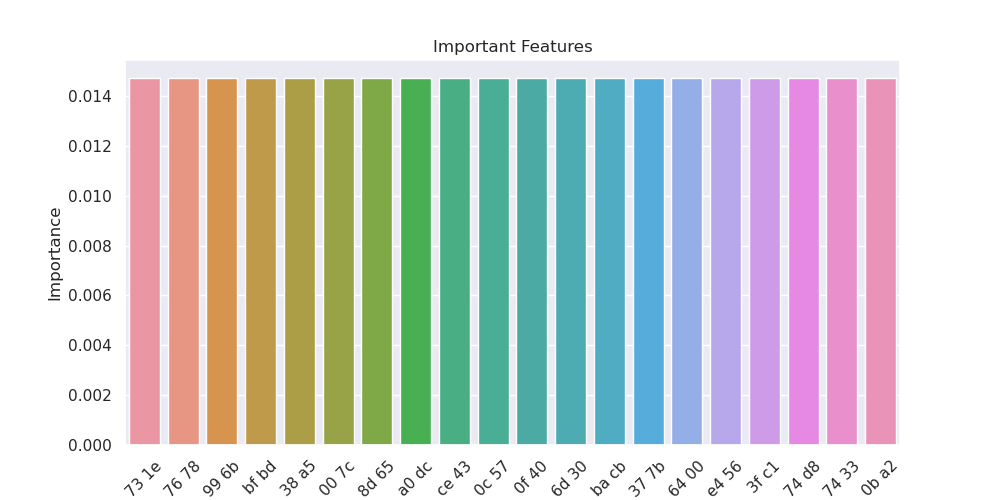

<IPython.core.display.Javascript object>


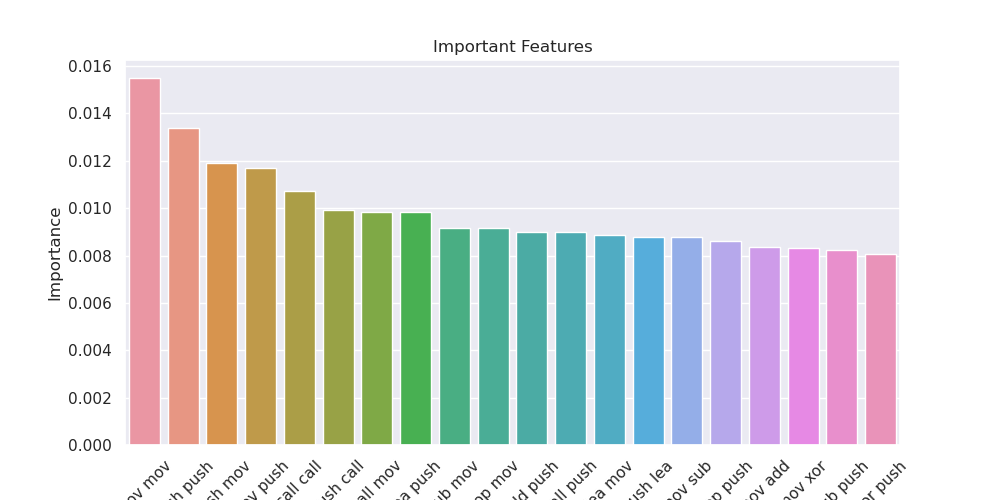

<IPython.core.display.Javascript object>


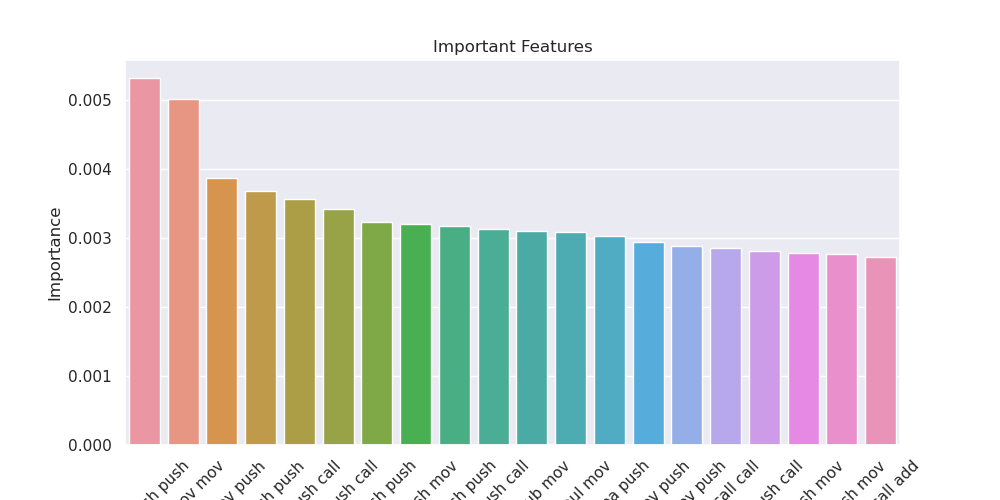

<IPython.core.display.Javascript object>


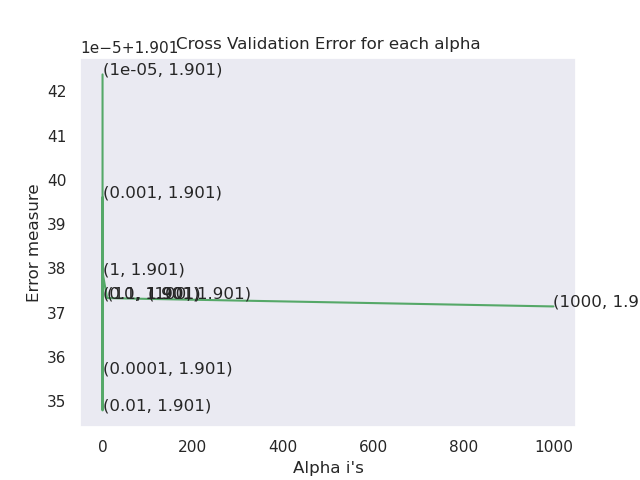

CPU times: user 21min 19s, sys: 5min 21s, total: 26min 41s
Wall time: 26min 42s


In [266]:
%%time
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(x_trn_final,y_trn_final)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(x_trn_final,y_trn_final)
    predict_y = sig_clf.predict_proba(x_cv_final)
    cv_log_error_array.append(log_loss(y_cv_final, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [267]:
%%time
logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(x_trn_final,y_trn_final)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(x_trn_final,y_trn_final)

predict_y = sig_clf.predict_proba(x_trn_final)
print ('log loss for train data',(log_loss(y_trn_final, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(x_cv_final)
print ('log loss for cv data',(log_loss(y_cv_final, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(x_test_final)
print ('log loss for test data',(log_loss(y_test_final, predict_y, labels=logisticR.classes_, eps=1e-15)))

log loss for train data 1.8975520093965081
log loss for cv data 1.9013478928557117
log loss for test data 1.8997023963996102
CPU times: user 2min 24s, sys: 36.4 s, total: 3min 1s
Wall time: 3min 1s


log_loss for c =  10 is 0.04673320821146289
log_loss for c =  100 is 0.028322314714394857
log_loss for c =  1000 is 0.027564418815455613
log_loss for c =  2000 is 0.027564652220458494


<IPython.core.display.Javascript object>


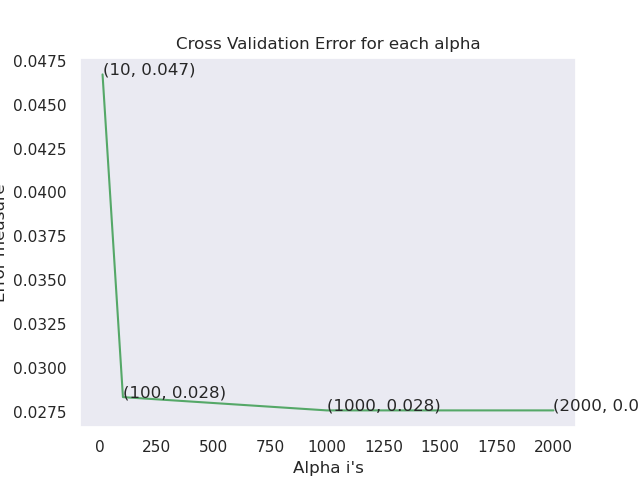

CPU times: user 6h 47min 50s, sys: 8.08 s, total: 6h 47min 58s
Wall time: 6h 48min 24s


In [268]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,100,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,eval_metric="merror")
    x_cfl.fit(x_trn_final,y_trn_final)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(x_trn_final, y_trn_final)
    predict_y = sig_clf.predict_proba(x_cv_final)
    cv_log_error_array.append(log_loss(y_cv_final, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


In [269]:
%%time
x_cfl=XGBClassifier(n_estimators=2000,nthread=-1,eval_metric="merror")
x_cfl.fit(x_trn_final,y_trn_final,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(x_trn_final, y_trn_final)

predict_y = sig_clf.predict_proba(x_trn_final)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_trn_final, predict_y))
predict_y = sig_clf.predict_proba(x_cv_final)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_final, predict_y))
predict_y = sig_clf.predict_proba(x_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_final, predict_y))

For values of best alpha =  1000 The train log loss is: 0.012481223316111583
For values of best alpha =  1000 The cross validation log loss is: 0.027564652220458494
For values of best alpha =  1000 The test log loss is: 0.02974045901581688
CPU times: user 3h 58min 57s, sys: 4.45 s, total: 3h 59min 1s
Wall time: 3h 59min 25s
